# Lending case study

### Problem statement
A *consumer finance company* which specialises in lending various types of loans would like to design a model which help the company has to make a decision for loan approval based on the applicant’s profile.
Now this would require a preliminary understanding of the features that define whether applicant's loan should be accepted or rejected.

In [1]:
#import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(8,6)})



plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 


#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset using pandas

loan = pd.read_csv('loan.csv')

In [3]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
#There are 39717 rows and 111 columns
loan.shape

(39717, 111)

In [5]:
#For easy readability
pd.set_option('display.max_columns',120)

In [6]:
#Check the columns
loan.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [7]:
##Observations:
#- All the columns follow naming convention.
#- Looks like there are many columns/attributes which are completely null.
#- Lets get the list of  columns with missing count more than 20%

## Date cleaning or refining

First lets start with columns:

In [8]:
empty_columns = loan.loc[:,loan.isnull().sum()/len(loan)> 0.2].columns.to_list()

In [9]:
# observation: 58 null columns with more than 20% missing values
len(empty_columns)

58

In [10]:
# Dropping null columns
loan_refine = loan.drop(empty_columns,axis=1)

In [11]:
#observation: left with 53 columns
loan_refine.shape

(39717, 53)

In [12]:
loan_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
loan_refine.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [14]:
#Drop customer behavior columns
customer_behavior_col = ['delinq_2yrs','delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

loan_refine = loan_refine.drop(customer_behavior_col,axis=1)

In [15]:
loan_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_title            37258 non-null  object 
 11  emp_length           38642 non-null  object 
 12  home_ownership       39717 non-null  object 
 13  annual_inc           39717 non-null  float64
 14  verification_status  39717 non-null  object 
 15  issue_d              39717 non-null 

In [16]:
#Dropping id/member_id as it is not analysis relevant data
loan_refine = loan_refine.drop(['id','member_id'],axis=1)

#Dropping further ..
#'title' as it is already present in purpose
#'pymnt_plan' as it has only one value 'n'
#'url' is not relevant for analysis

loan_refine = loan_refine.drop(['title','pymnt_plan','url'],axis=1)

In [17]:
# observation: Left with 18 columns and out of these, two columns still have empty values()
loan_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

In [18]:
loan_refine.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [19]:
#observation: 70% of the rows have unique values with some duplicates titles with different naming convention. Although
#we can enrich this column but there is a good chance, we end up with many unique titles. So for now, we drop this column too.

#Dropping 'emp_title'
loan_refine = loan_refine.drop(['emp_title'],axis=1)

In [20]:
loan_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  zip_code             39717 non-null 

#### Lets fill the empty values in emp_length by taking the median of the data set

In [21]:
mean_emp_length=loan_refine.emp_length.dropna().apply(lambda x : int(10) if x =='10+ years' else( int(0) if x=='< 1 year' else(int(1) if x =='1 year' else(None if pd.isna(x) else x.replace('years',''))))).median()
loan_refine.loc[loan_refine.emp_length.isnull(),'emp_length']=str(int(mean_emp_length))+' years'

In [22]:
#observation: There are no more error in the data set
loan_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           39717 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  zip_code             39717 non-null 

In [23]:
loan_refine.emp_length.value_counts()

10+ years    8879
< 1 year     4583
4 years      4511
2 years      4388
3 years      4095
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

#### Cleaning the rows

##### Remove rows with status Current as these rows are not deciding factor

In [24]:
loan_refine = loan_refine[~(loan_refine.loan_status == 'Current')]

### Standarisation

Convert following coloumns to appropriate dtype:

    - int_rate (float64)
    - emp_length (int64)
    - issue_d (datetime)
    

In [25]:
# # As per the defination:
# #emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

loan_refine.emp_length = loan_refine.emp_length.apply(lambda x : int(10) if x =='10+ years' else( int(0) if x=='< 1 year' else(int(1) if x =='1 year' else(x.replace('years','') if 'years' in x else int(x)))))


In [26]:
loan_refine.emp_length = loan_refine.emp_length.astype('int64')

In [27]:
loan_refine.int_rate = loan_refine.int_rate.apply(lambda x:float(x.split('%')[0]))

In [28]:
loan_refine['issue_d'] = pd.to_datetime(loan_refine['issue_d'],format='%b-%y')

In [29]:
loan_refine.describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123     11.932219   
std     7348.441646   7090.306027      7022.720644      3.691327   
min      500.000000    500.000000         0.000000      5.420000   
25%     5300.000000   5200.000000      5000.000000      8.940000   
50%     9600.000000   9550.000000      8733.440000     11.710000   
75%    15000.000000  15000.000000     14000.000000     14.380000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment    emp_length    annual_inc           dti  
count  38577.000000  38577.000000  3.857700e+04  38577.000000  
mean     322.466318      4.915779  6.877797e+04     13.272727  
std      208.639215      3.512419  6.421868e+04      6.673044  
min       15.690000      0.000000  4.000000e+03      0.000000  
25%      165.740000      2.000000  4.000000e+04      8.130000  
50%      277.860000      4.000000  5.886800e+04     13.370000  
75%      425.550000      9.000000  8.200000e+04     18.560000  
max     1305.190000     10.000000  6.000000e+06     29.990000

In [30]:
# Extract month from 'issue_d'
loan_refine['issue_month']=loan_refine['issue_d'].dt.strftime('%B')

In [31]:
loan_refine['issue_month']

0        December
1        December
2        December
3        December
5        December
           ...   
39712        July
39713        July
39714        July
39715        July
39716        June
Name: issue_month, Length: 38577, dtype: object

In [32]:
loan_refine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  int64         
 1   funded_amnt          38577 non-null  int64         
 2   funded_amnt_inv      38577 non-null  float64       
 3   term                 38577 non-null  object        
 4   int_rate             38577 non-null  float64       
 5   installment          38577 non-null  float64       
 6   grade                38577 non-null  object        
 7   sub_grade            38577 non-null  object        
 8   emp_length           38577 non-null  int64         
 9   home_ownership       38577 non-null  object        
 10  annual_inc           38577 non-null  float64       
 11  verification_status  38577 non-null  object        
 12  issue_d              38577 non-null  datetime64[ns]
 13  loan_status          38577 non-

### Univariate analysis - Continuous variables

Now that we have all the data in the required formate, lets start with analysis

In [33]:
#separating the numerical and categorical columns
numeric_cols = loan_refine.select_dtypes(['float64','int64']).columns.to_list()
categorical_cols = loan_refine.select_dtypes(['object']).columns.to_list()

In [34]:
print(numeric_cols)
print(categorical_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti']
['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'issue_month']


loan_amnt


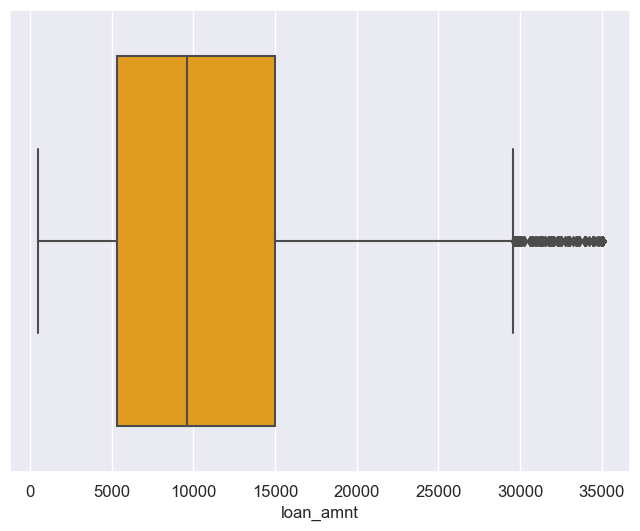

funded_amnt


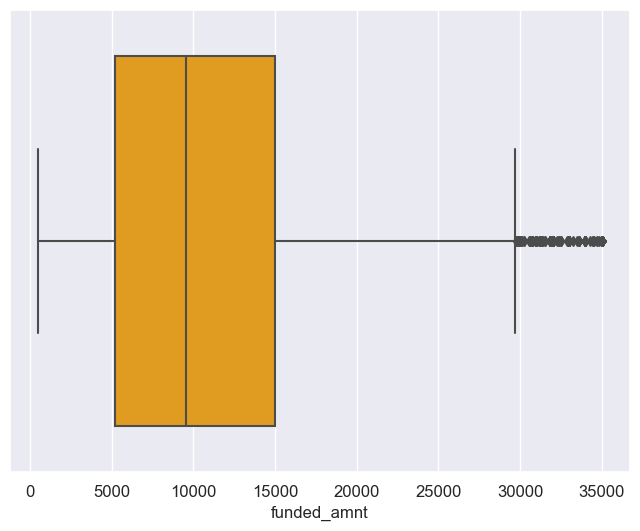

funded_amnt_inv


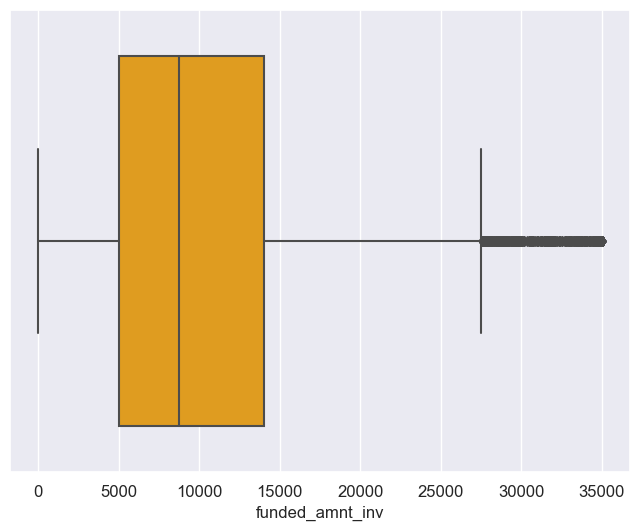

int_rate


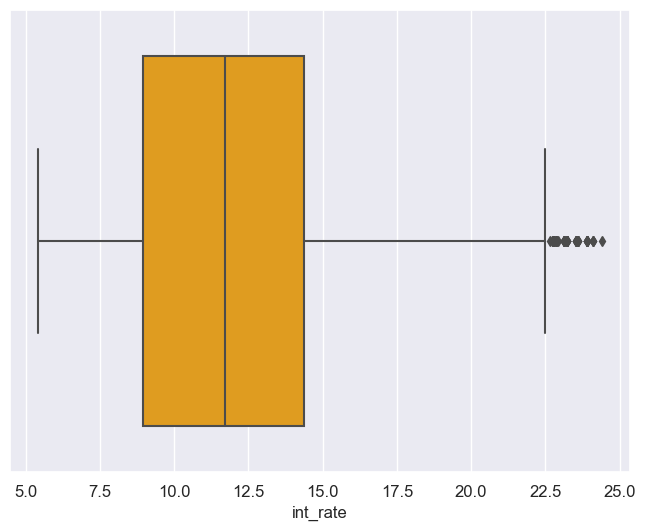

installment


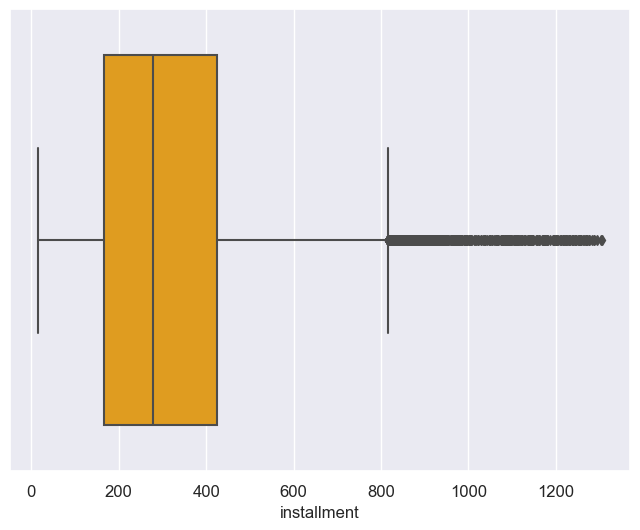

emp_length


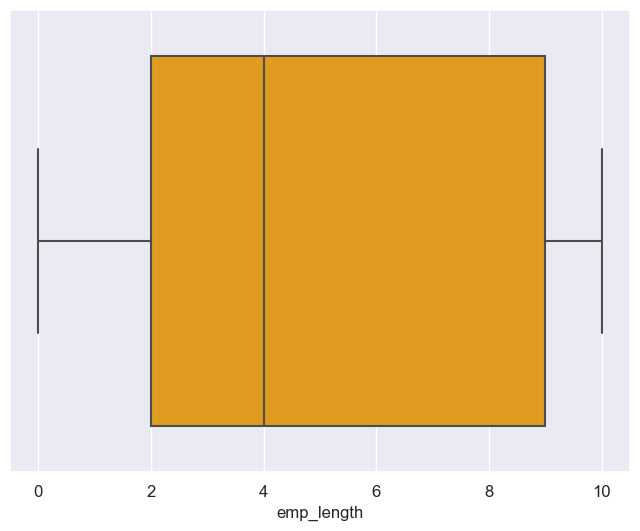

annual_inc


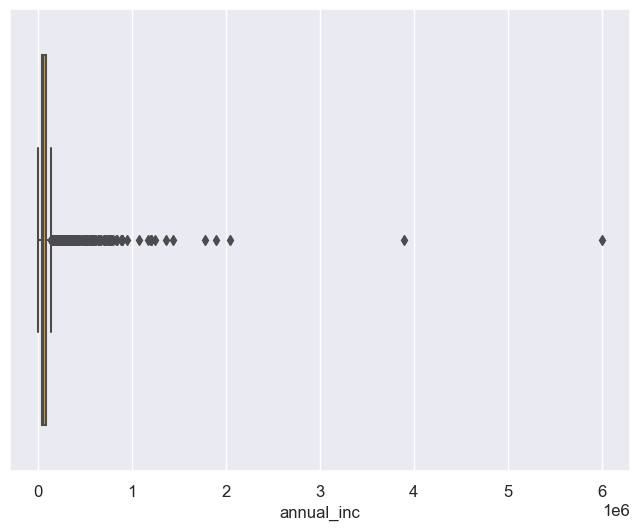

dti


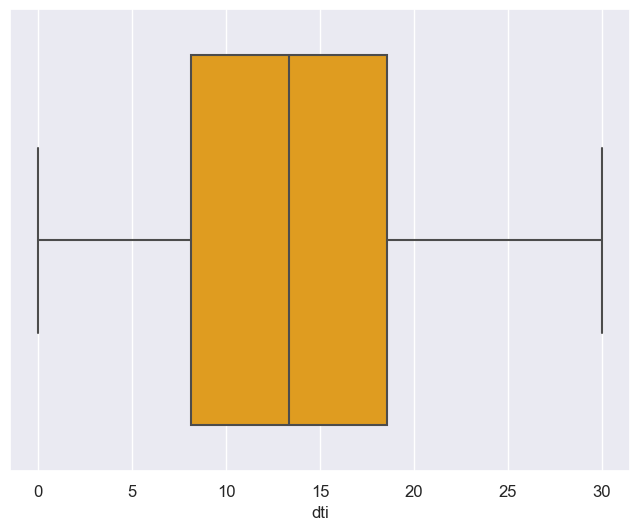

In [35]:
#Check for outliers in numberic_cols
def outlier_box_plot(df,col):
    sns.boxplot(x=df[col],color='orange')
    plt.show()


for col in numeric_cols:
    print(col)
    outlier_box_plot(loan_refine,col)

#observation: annual_inc has many outliers.

In [36]:
loan_refine[loan_refine.annual_inc > 1300000]

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
7247       12025        12025      12000.00000   36 months     14.27   
23551       1500         1500       1500.00000   36 months      6.17   
29639      25000        15500      11430.00082   60 months     10.62   
30107       5000         5000       5000.00000   36 months     12.73   
33982       6400         6400       6300.00000   36 months      7.40   
34304       6600         6600       6600.00000   36 months      7.74   
39089       8450         8450       3747.00000   36 months     12.29   

       installment grade sub_grade  emp_length home_ownership  annual_inc  \
7247        412.57     C        C2          10           RENT   1782000.0   
23551        45.75     A        A3           5       MORTGAGE   1900000.0   
29639       334.08     B        B3           3       MORTGAGE   3900000.0   
30107       167.84     C        C1          10       MORTGAGE   6000000.0   
33982       198.78     A        A2           7       MORTGAGE   1440000.0   
34304       206.05     A        A3           9       MORTGAGE   1362000.0   
39089       281.84     C        C5           0           RENT   2039784.0   

      verification_status    issue_d loan_status             purpose zip_code  \
7247         Not Verified 2011-09-01  Fully Paid  debt_consolidation    108xx   
23551     Source Verified 2010-11-01  Fully Paid         credit_card    773xx   
29639        Not Verified 2010-06-01  Fully Paid    home_improvement    882xx   
30107     Source Verified 2010-05-01  Fully Paid    home_improvement    939xx   
33982        Not Verified 2009-11-01  Fully Paid      major_purchase    953xx   
34304        Not Verified 2009-11-01  Fully Paid  debt_consolidation    801xx   
39089        Not Verified 2008-03-01  Fully Paid  debt_consolidation    331xx   

      addr_state   dti issue_month  
7247          NY  1.31   September  
23551         TX  0.57    November  
29639         NM  0.20        June  
30107         CA  0.01         May  
33982         CA  0.00    November  
34304         CO  0.62    November  
39089         FL  0.13       March

Observation:


Applicant with more that 1300000 annual_inc and with a loan amount less than 1 percent with a very good DTI score.
Even if there are real, it is a safe bet that borrower pays back without any issue. 
So removing the records which are having annual income more than 1300000

In [37]:
loan_refine = loan_refine[loan_refine.annual_inc < 1300000]

<AxesSubplot:xlabel='annual_inc'>

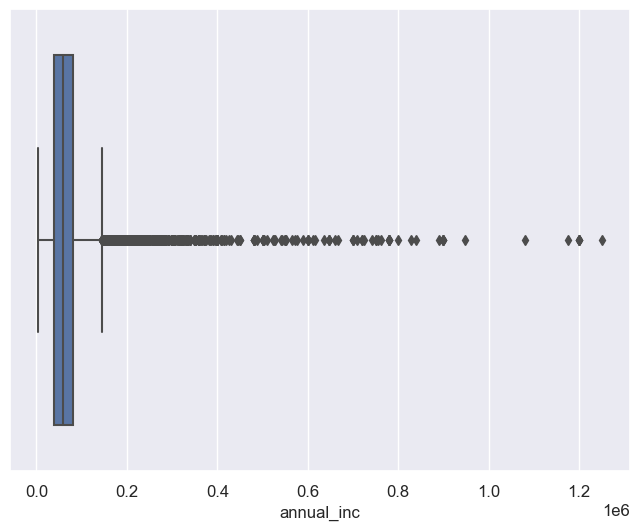

In [38]:
# Plot of annual_inc after removing outliers

sns.boxplot(x=loan_refine.annual_inc)

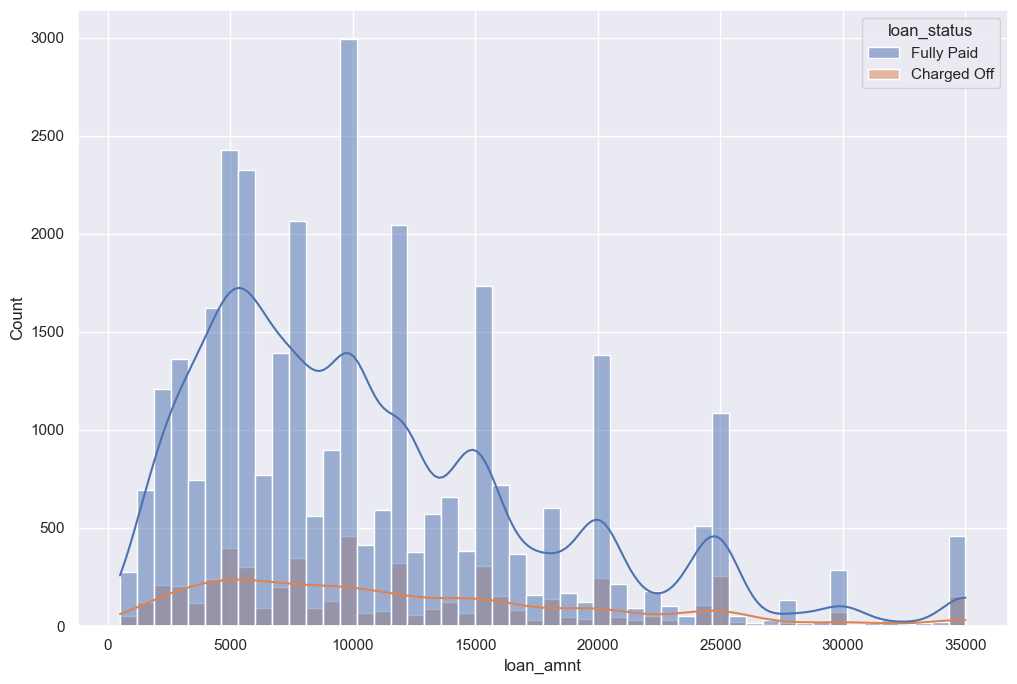

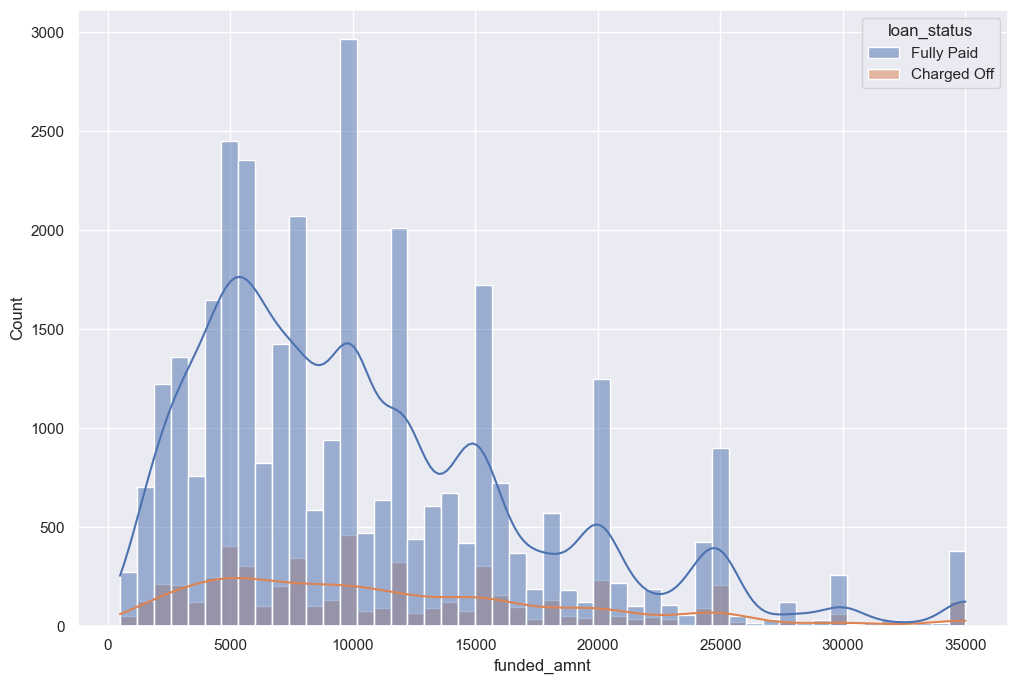

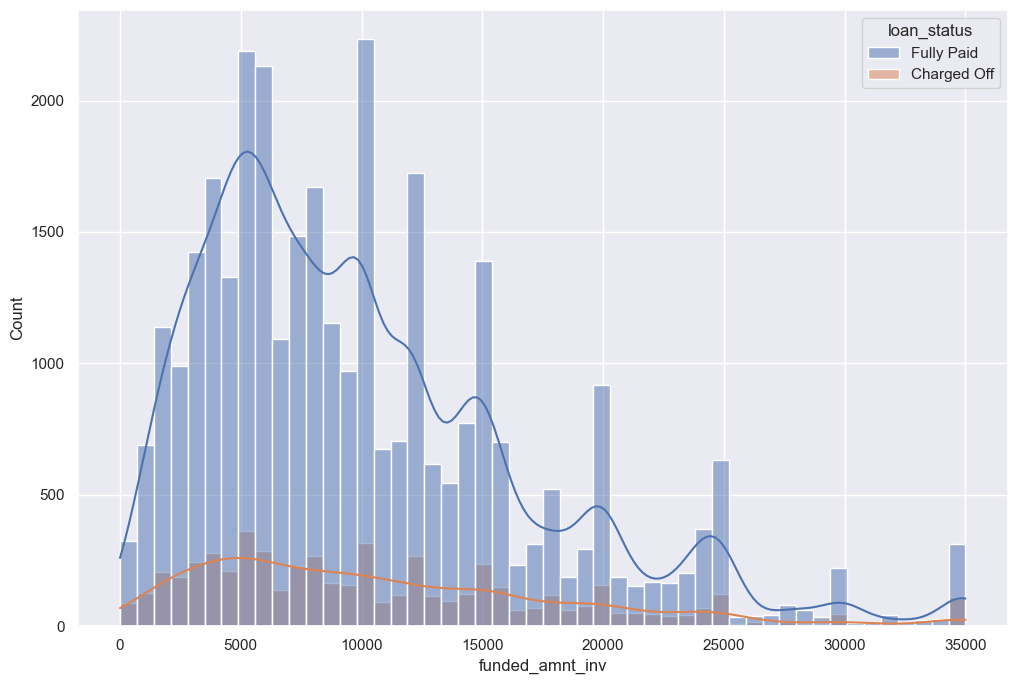

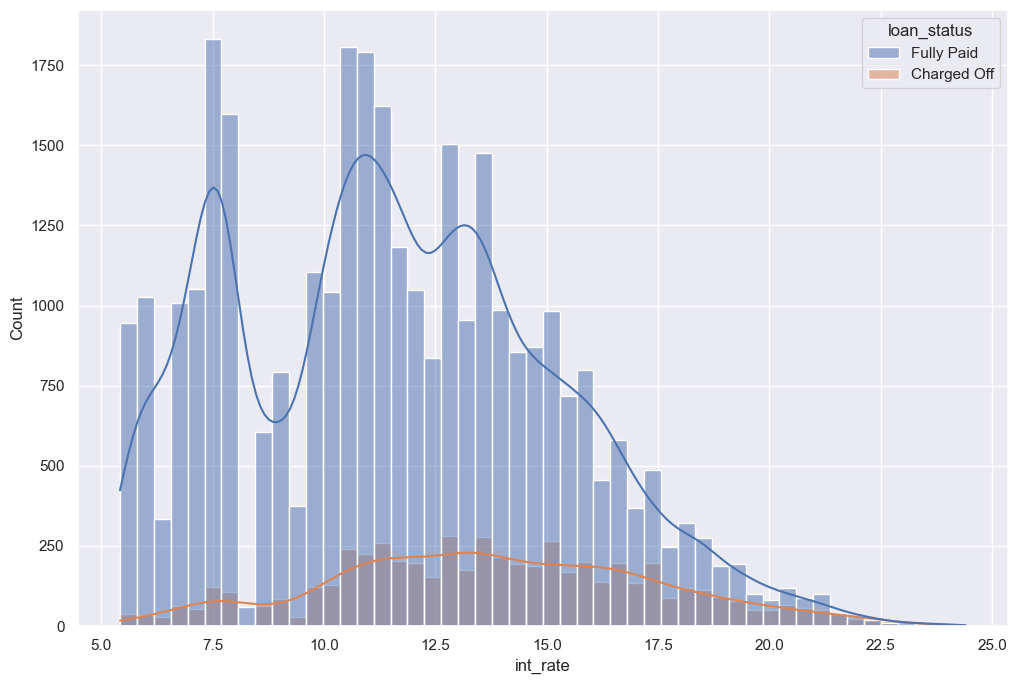

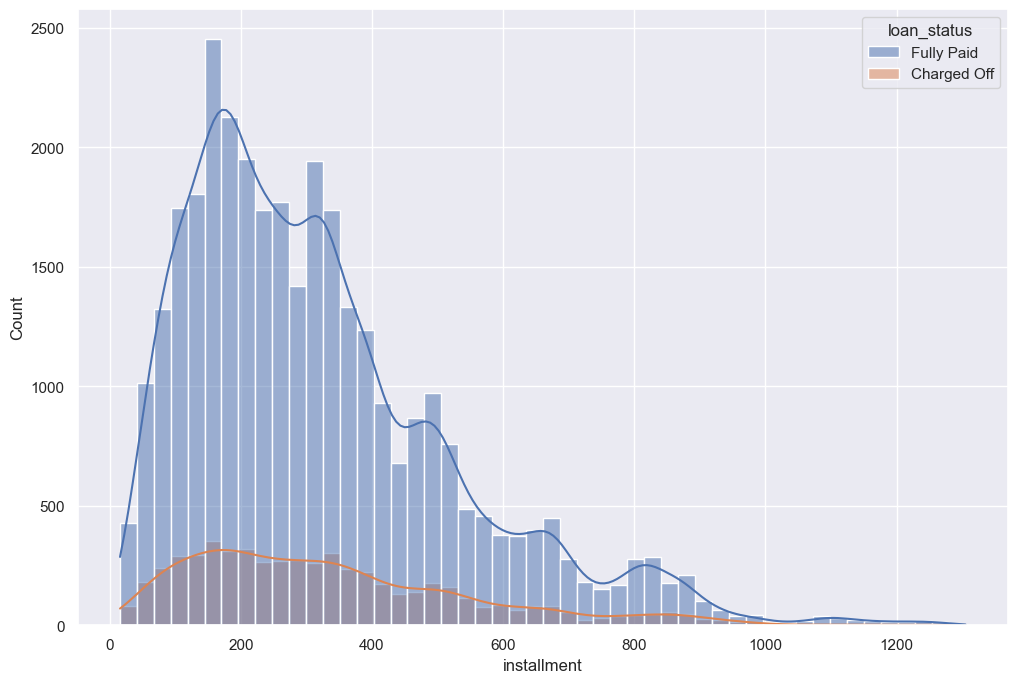

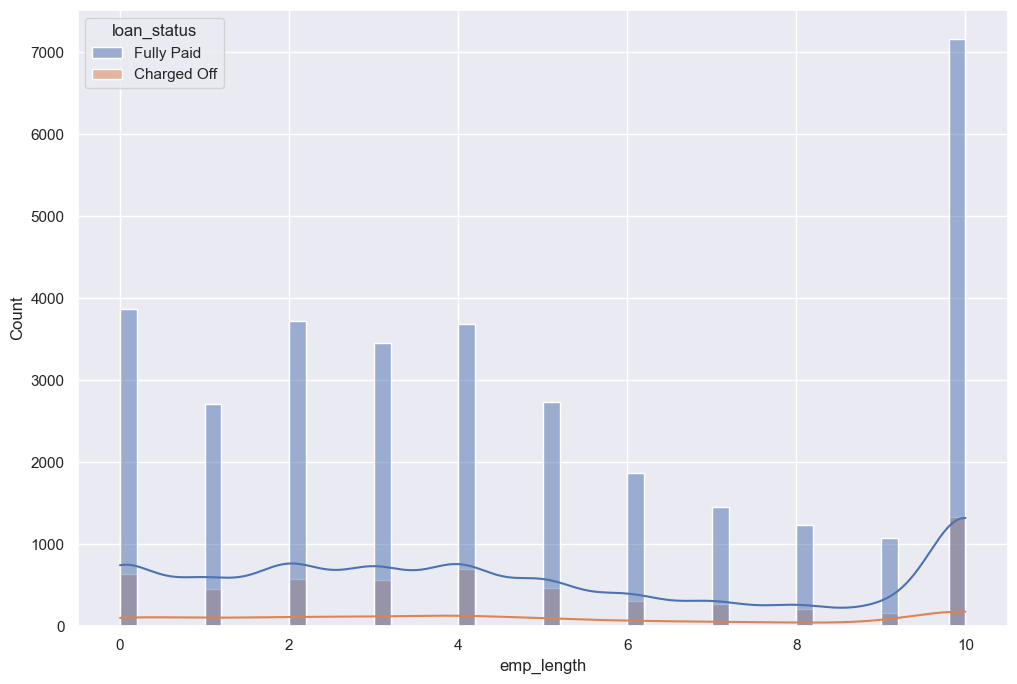

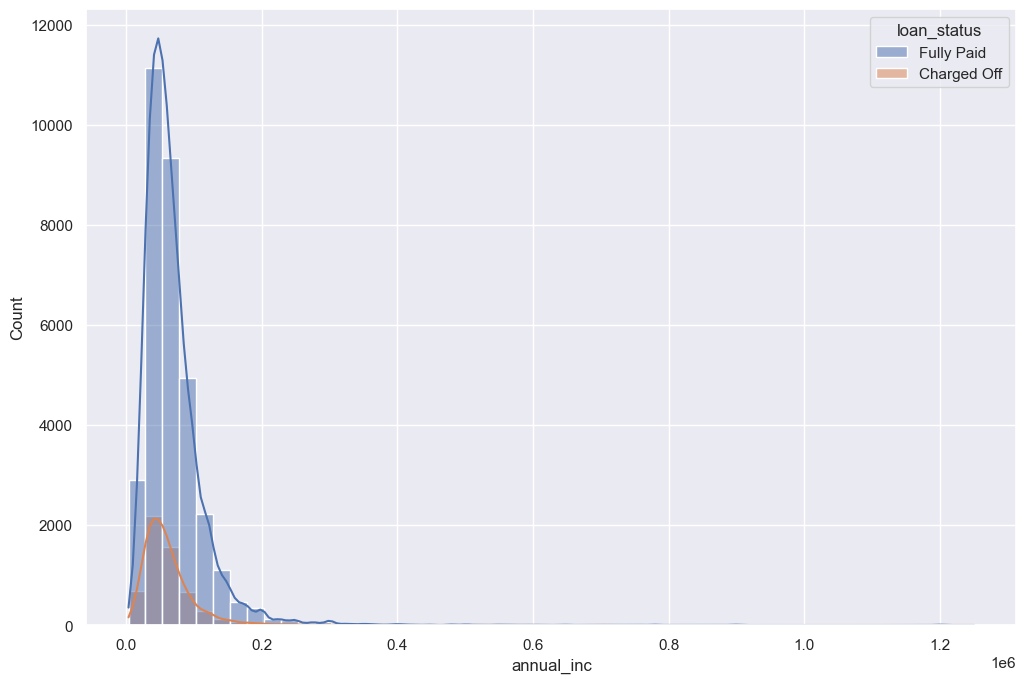

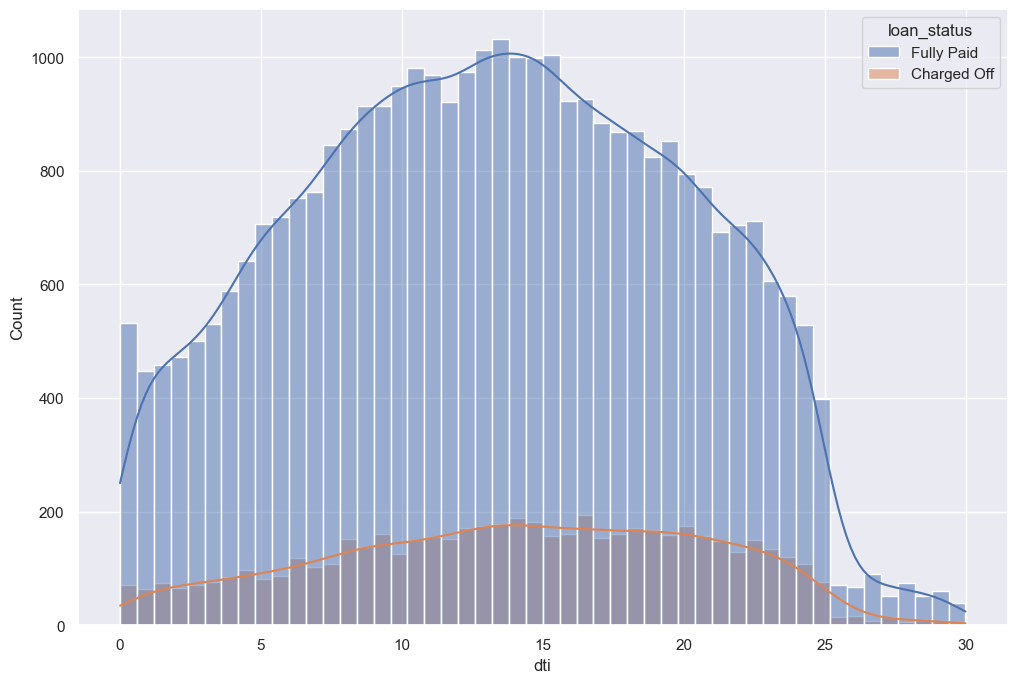

In [39]:
# Checking the distribution with histogram
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,8)})
def plot_hist(df,col):
    sns.histplot(data = df,x=df[col],kde=True,bins=50,hue='loan_status')
    plt.show()
    
for col in numeric_cols:
    plot_hist(loan_refine,col)

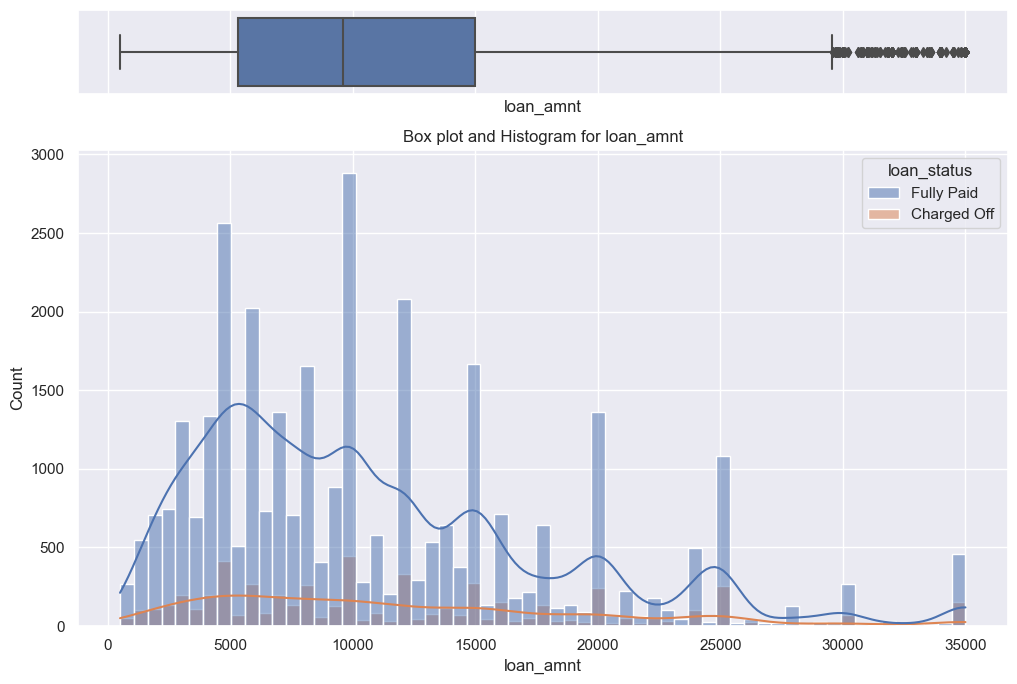

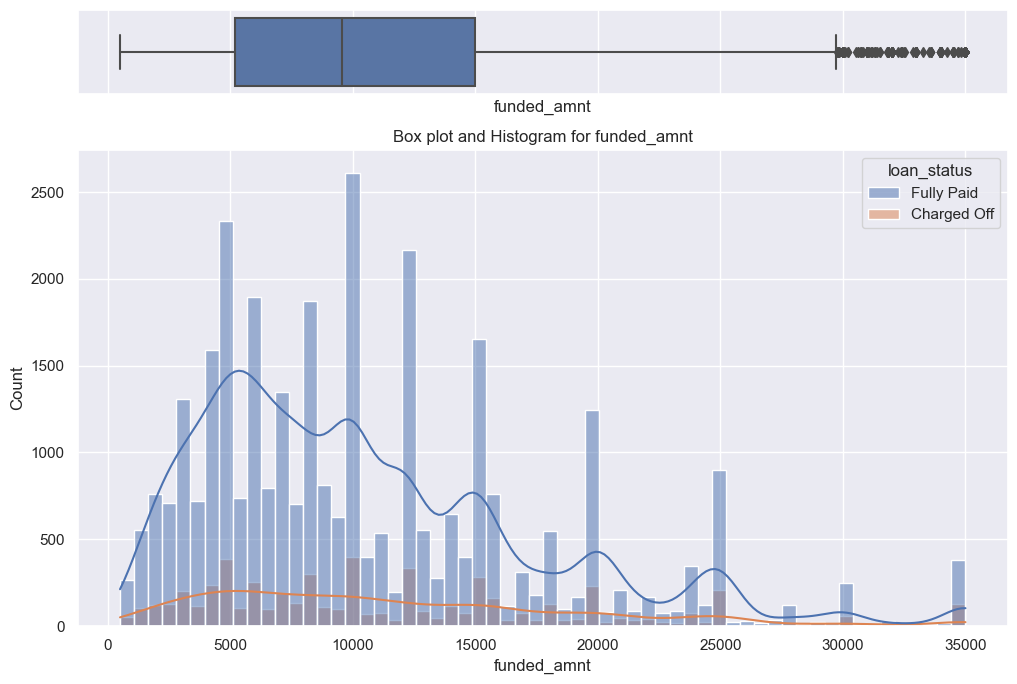

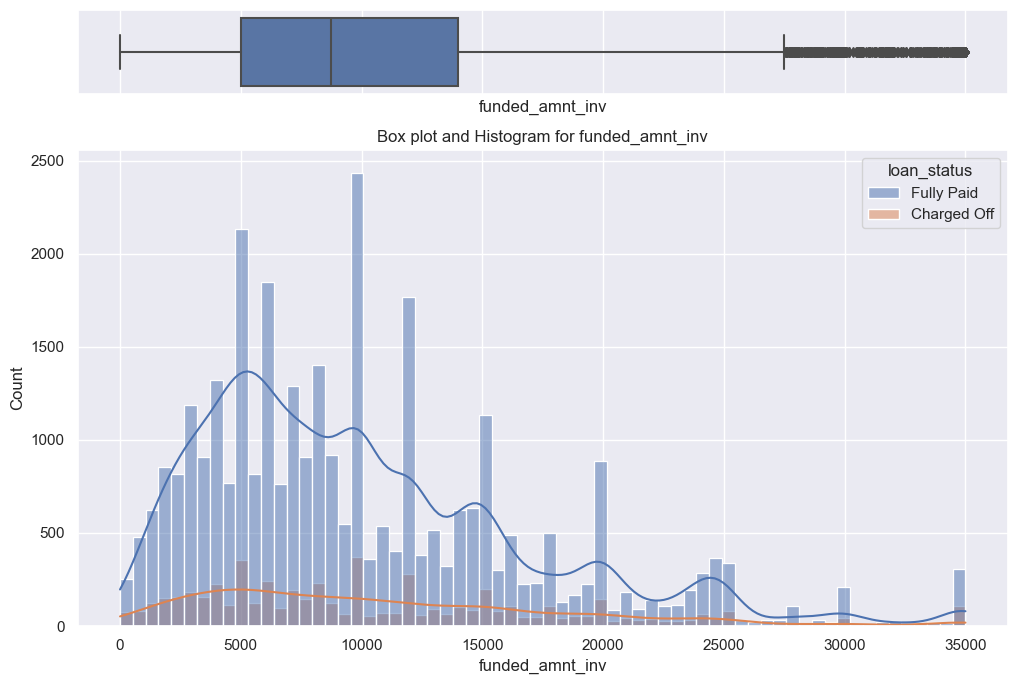

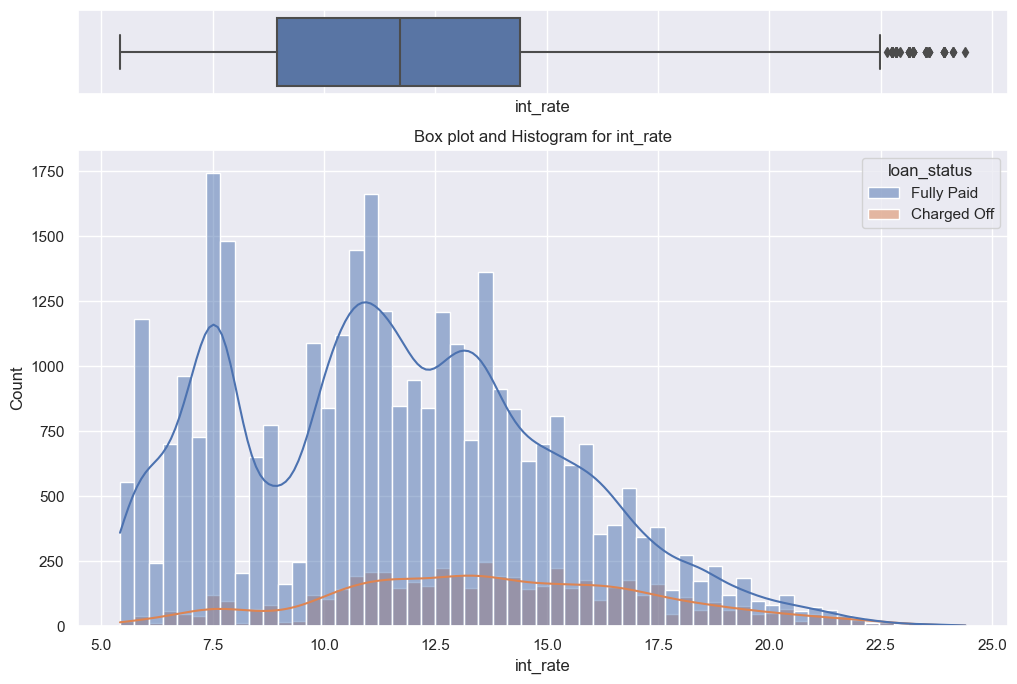

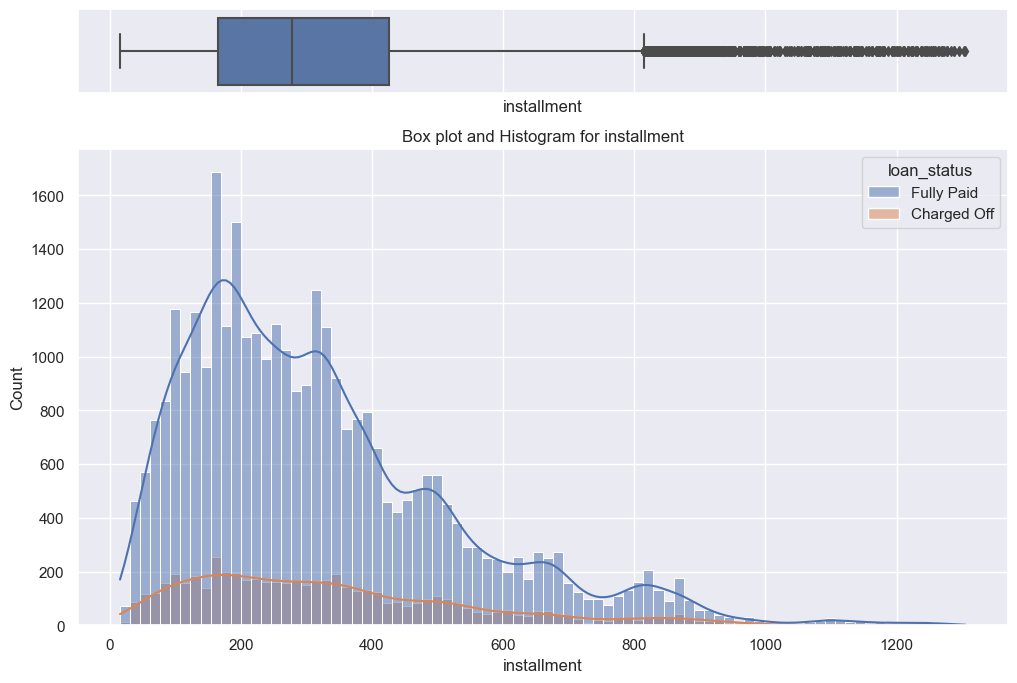

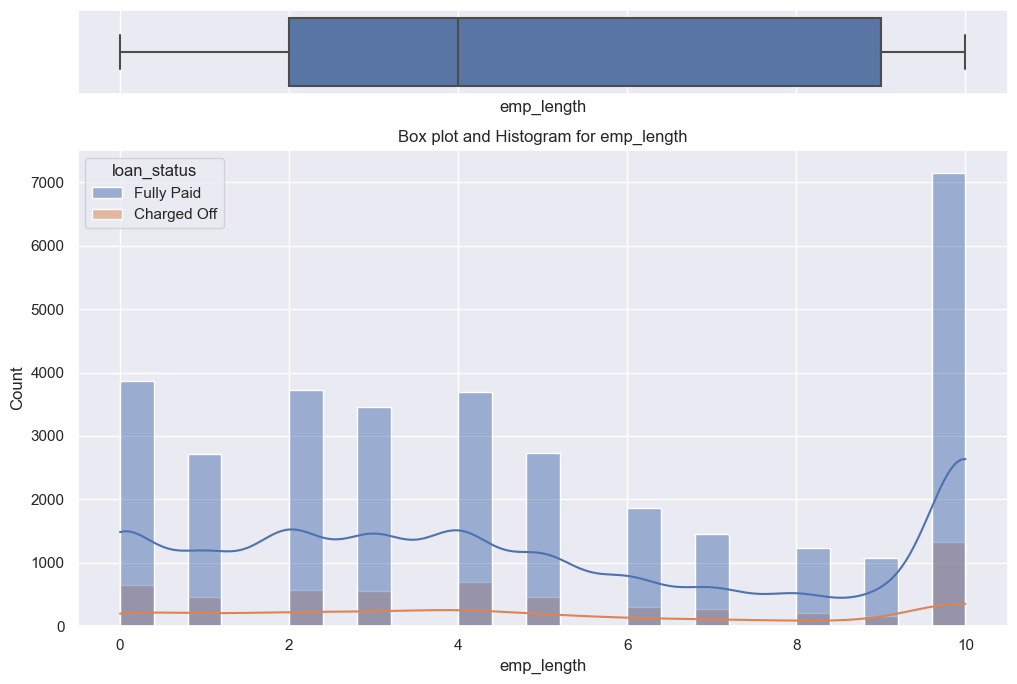

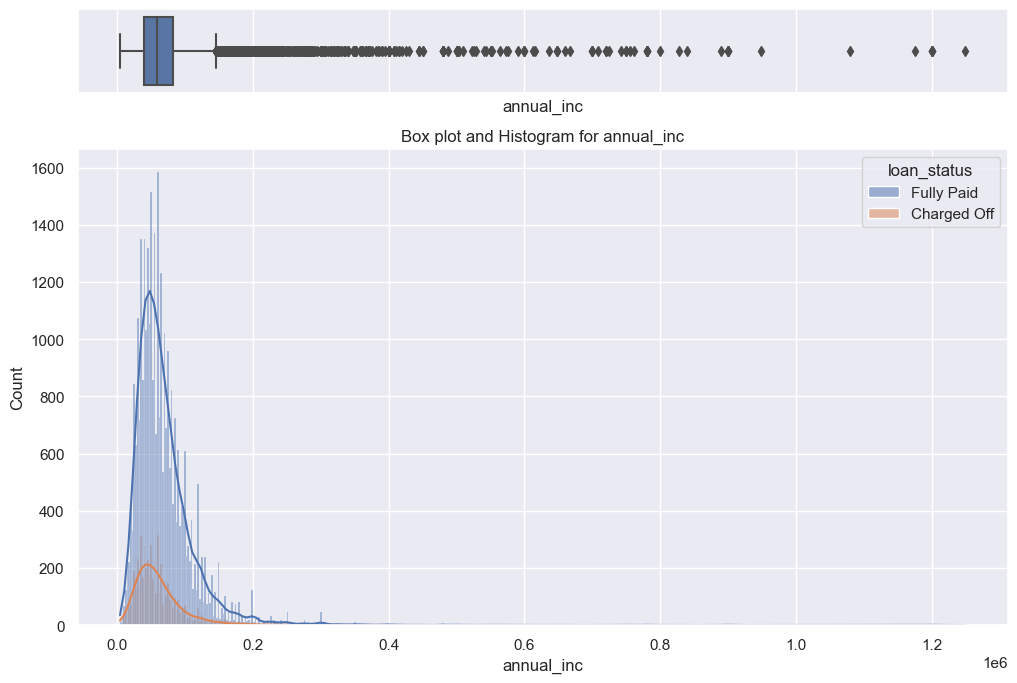

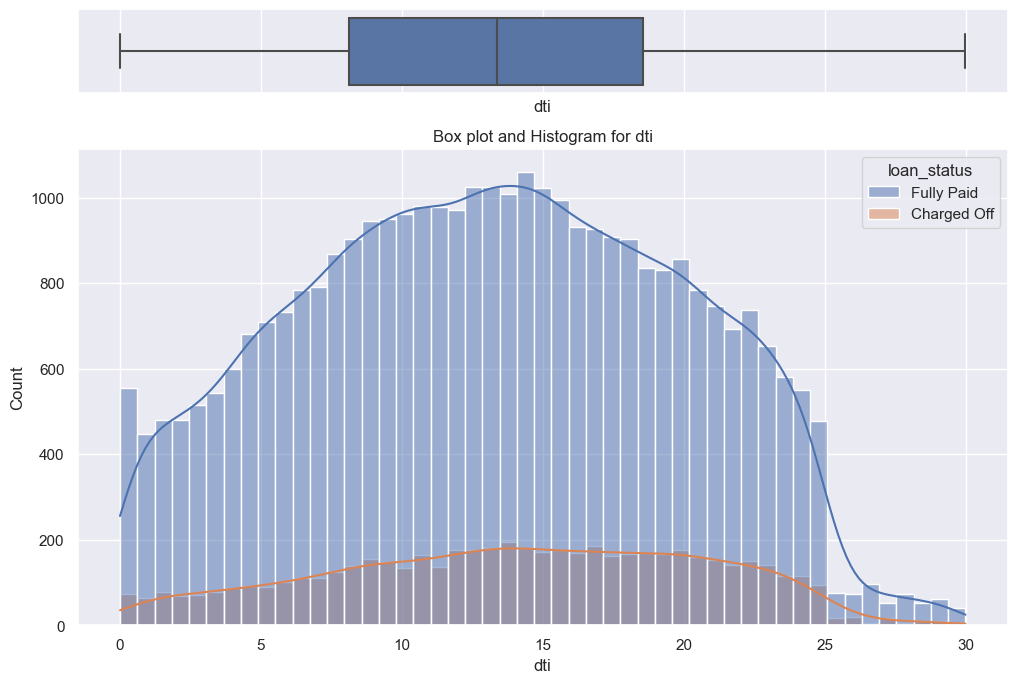

In [40]:
# ploting both box plot and histogram together
def creating_box_hist(column, df):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})    
    
    plt.title("Box plot and Histogram for "+ column)
    
    sns.histplot(data=df, x=column, ax=ax_hist,hue='loan_status',kde=True)
    sns.boxplot(df[column], ax=ax_box)
    
    plt.show()

for i in range(8):
    creating_box_hist(numeric_cols[i],loan_refine)

#### Observations from box plot and histogram:

    - Most of the loan appliants are having 10 or more years of experience. So mostly they are in 30s
    - High portion of the applicants are having annual income between 50k-100k.
    - DTI score of applicants mostly follow the normal distribution
    - Interest rate is mostly falls between 10-14.5%
    - loan_amnt/funded_amnt/funded_amnt_inv follow same distribution. Looks like applicants are grant to close amount as quested.

### Univariate analysis - Categorical variables

In [41]:
def cat_plot(df,col):
    sns.countplot(df[col])
    plt.xlabel(col)
    plt.xticks(fontsize = 10,rotation=90,font='Arial')
    plt.title("Count plot on "+ col )
    plt.show()

term


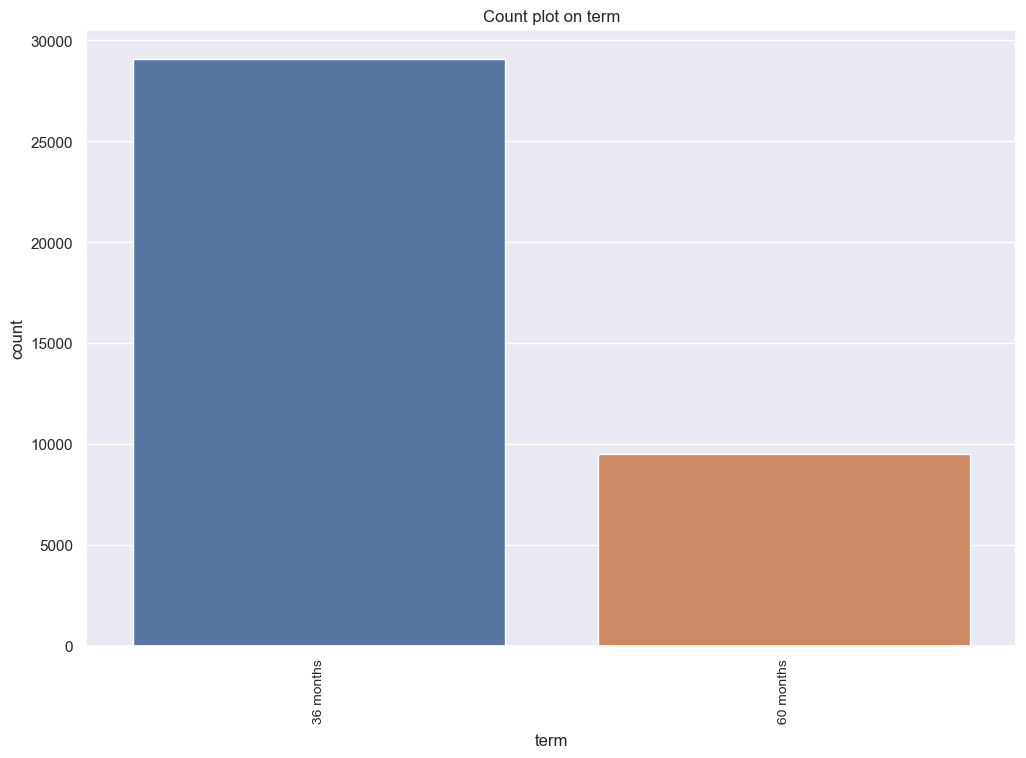

grade


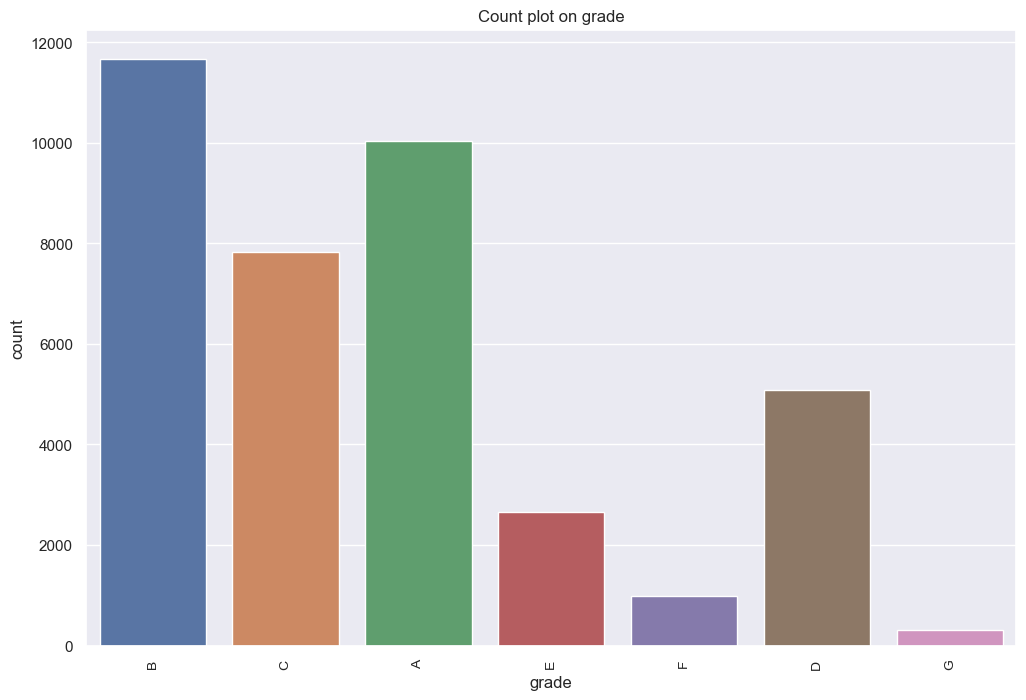

sub_grade


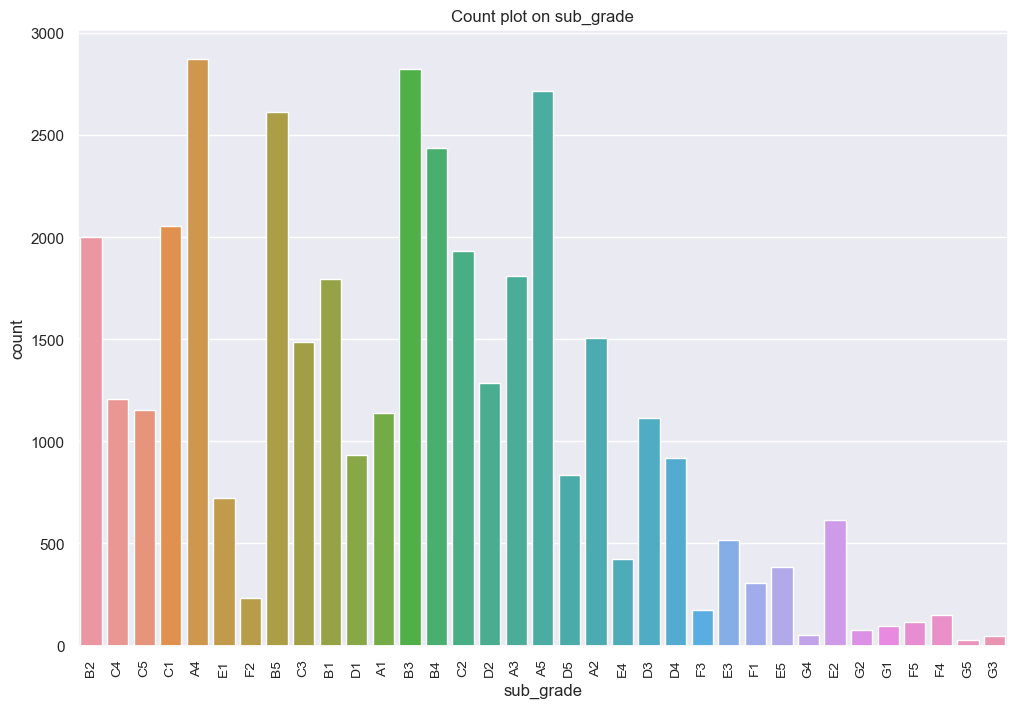

home_ownership


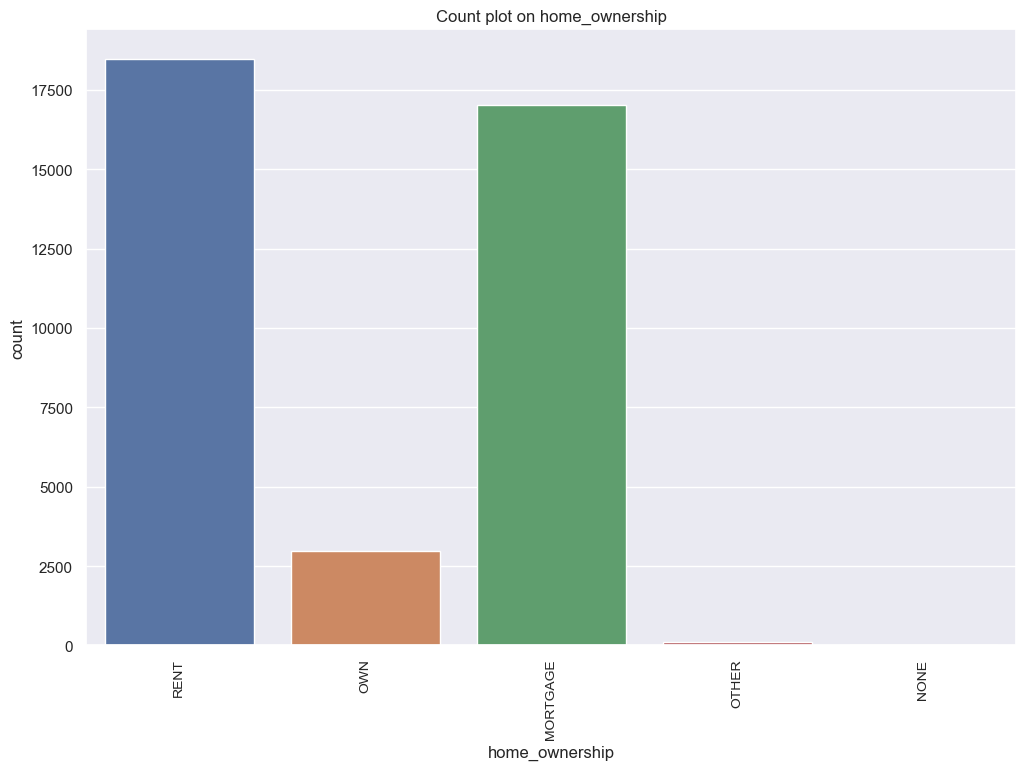

verification_status


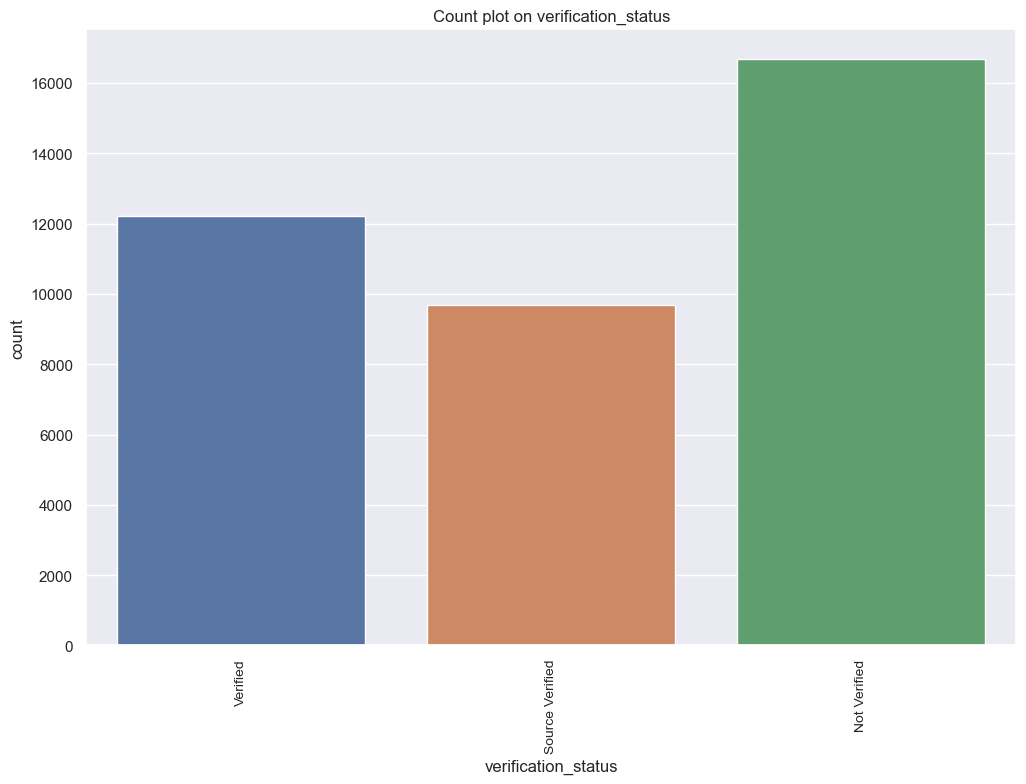

loan_status


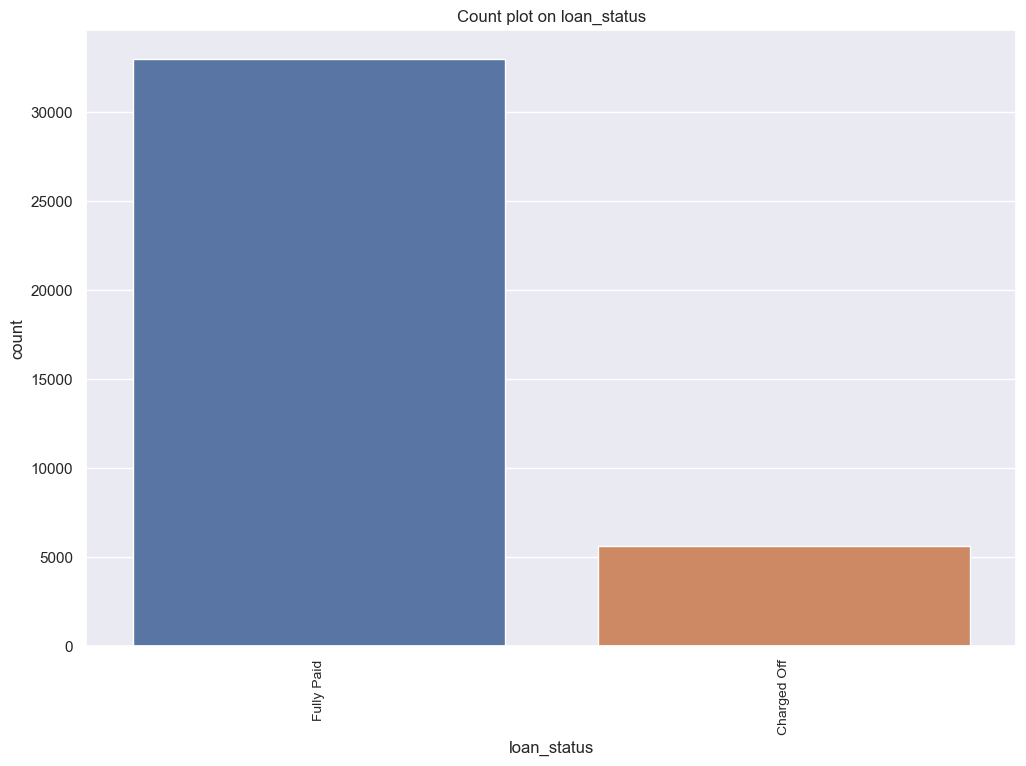

purpose


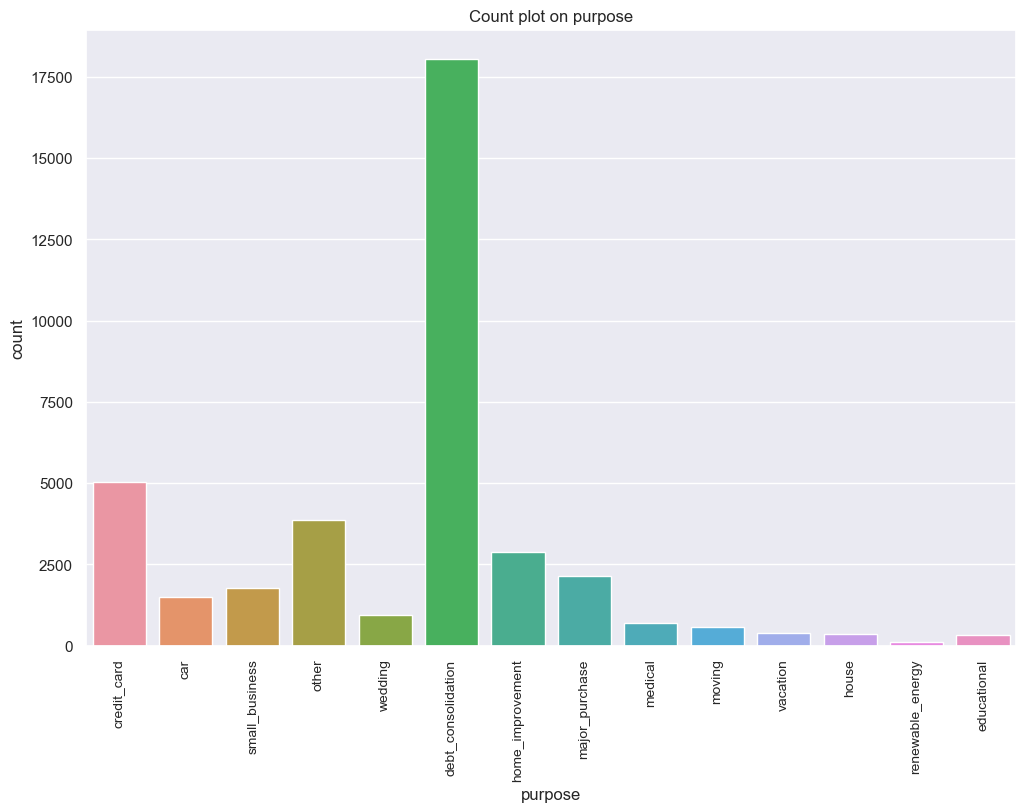

addr_state


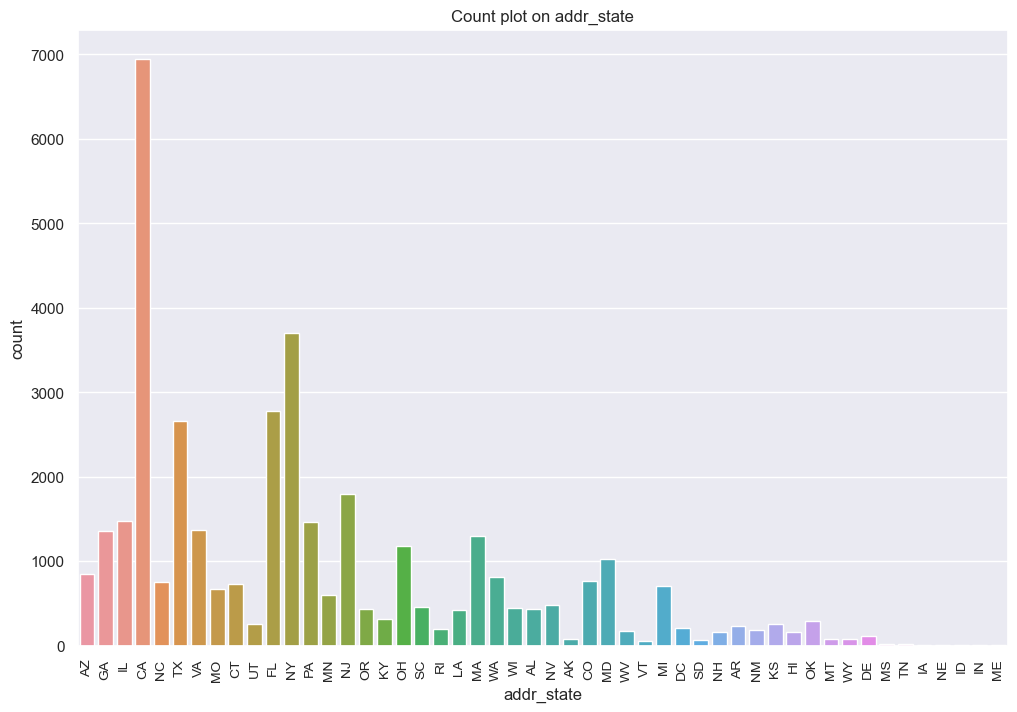

issue_month


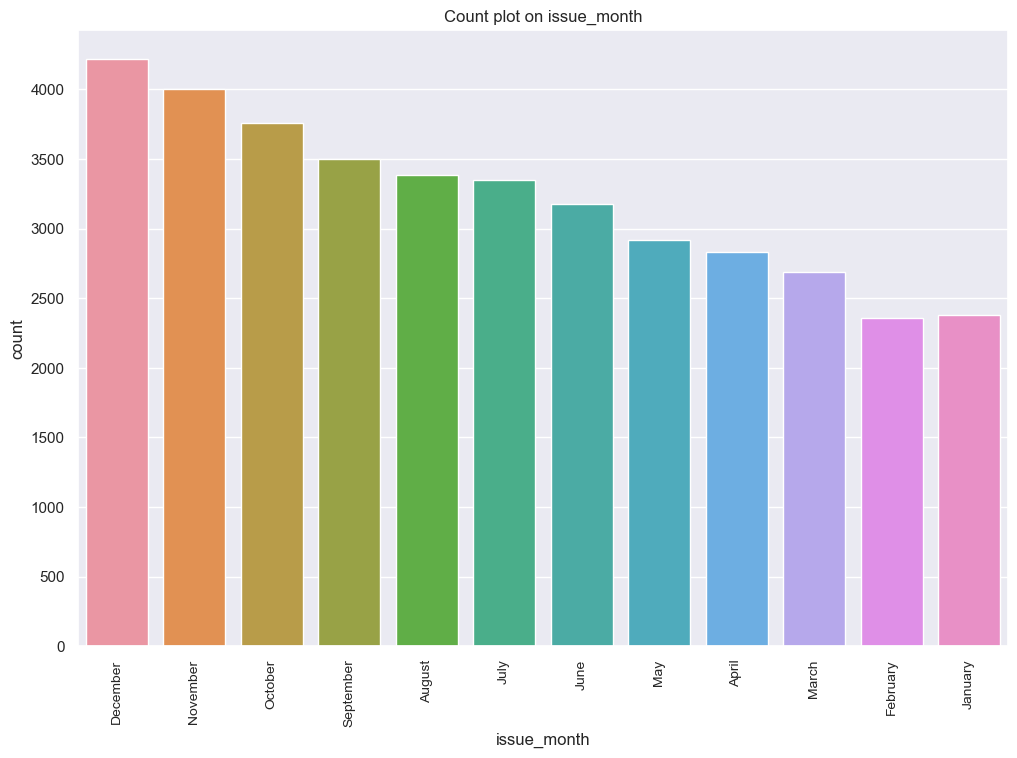

In [42]:
# ignore zipcode for now, as there are many unique values.
for col in categorical_cols:
    if(str(col) != 'zip_code'):
        print(col)
        cat_plot(loan_refine,col)
    else:
        continue

#### Observations - Categorical values

    - Maximum loan applications are from CA and least from ME
    - Most of the loan applicant doesnot OWN any property.
    - Maximum loan applicaition are from grade 'B' and least from 'G'
    - In the data provided, arounded 5K applicants got defaulted.
    - 'debt_consolidation' is the most motivation for the loan application compared to other categories.
    - Most of the applicants preferred 36 years as term.
    - Majority of the loans are approved with out having the Income status verified.
    - Maximum applicants are from zip code 900XX-1000xx
    - Number of loan applications increases towards the year end with max at December. Could be because of festival session.

### Segmented Unianalysis and Business drive  analysis
Here from the business point of view, loan status is the critical attribute, so considering loan_status, lets try to do segmention of the other parameters

- Applicants defaulted based on purpose stated

- Applicants defaulted based on addr_state

- Applicants defaulted based on grade

- Applicants defaulted based on annual_inc

- Applicants defaulted based on int_rate

- Applicants defaulted based on term selected

- Applicants defaulted based on home ownership selected

- Applicants defaulted based on dti

##### Applicants defaulted based on purpose stated

Text(0.5, 1.0, 'Applicants defaulted based on purpose')

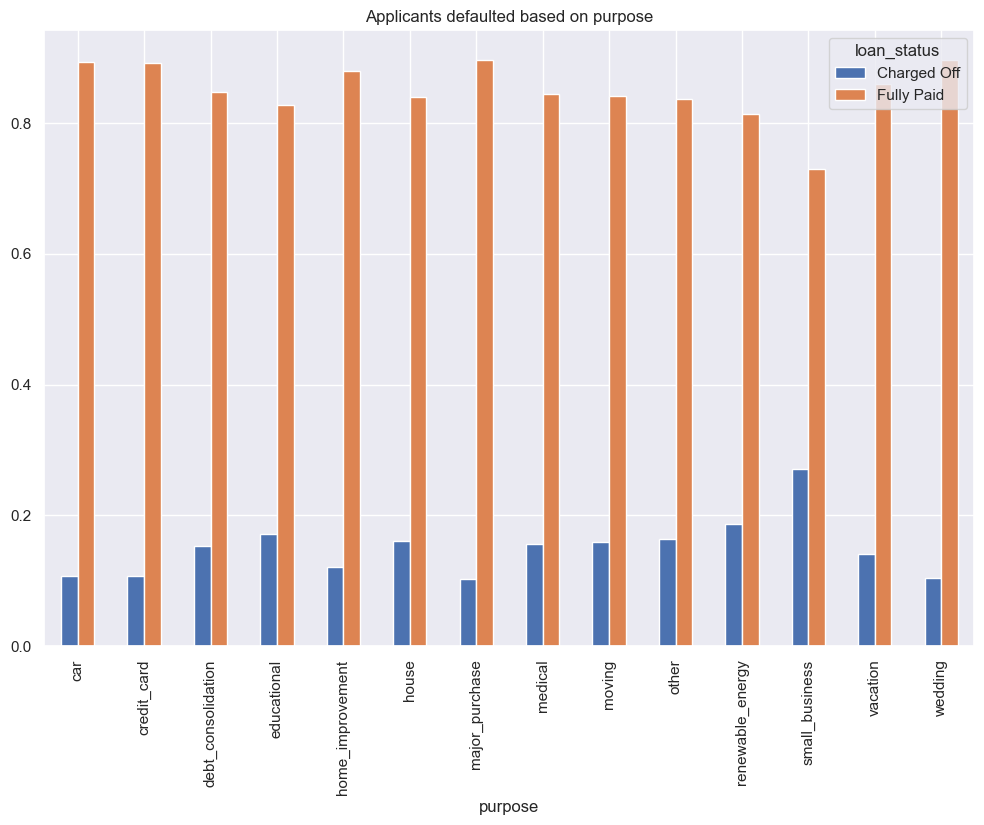

In [43]:
# Applicants defaulted based on purpose
loan_cross_purpose_i= pd.crosstab(index=loan_refine['purpose'],columns=loan_refine['loan_status'],normalize='index')

loan_cross_purpose_i.plot.bar();
plt.title("Applicants defaulted based on purpose")
#observation: Ratio of defaulters are more in small_busniess.

##### Applicants defaulted based on addr_state

Text(0.5, 1.0, 'Applicants defaulted based on addr_state')

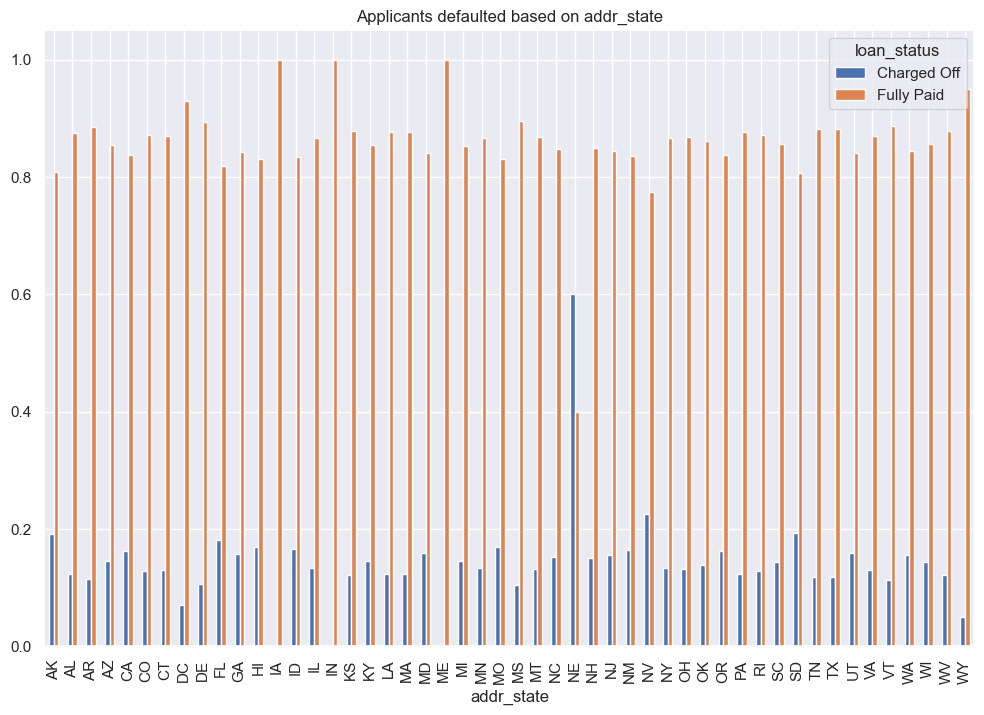

In [44]:

loan_cross_addr_state_i= pd.crosstab(index=loan_refine['addr_state'],columns=loan_refine['loan_status'],normalize='index')

loan_cross_addr_state_i.plot.bar();
plt.title("Applicants defaulted based on addr_state")

#Initial observation: High defaulters in NE and IA/ME/IN is good business area
    

In [45]:
loan_refine.addr_state.value_counts()
#Observation: Very less customer from NE/IA/ME/IN

CA    6947
NY    3697
FL    2780
TX    2658
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     765
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     182
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

Text(0.5, 1.0, 'Ratio of defaulters rate among the top business states')

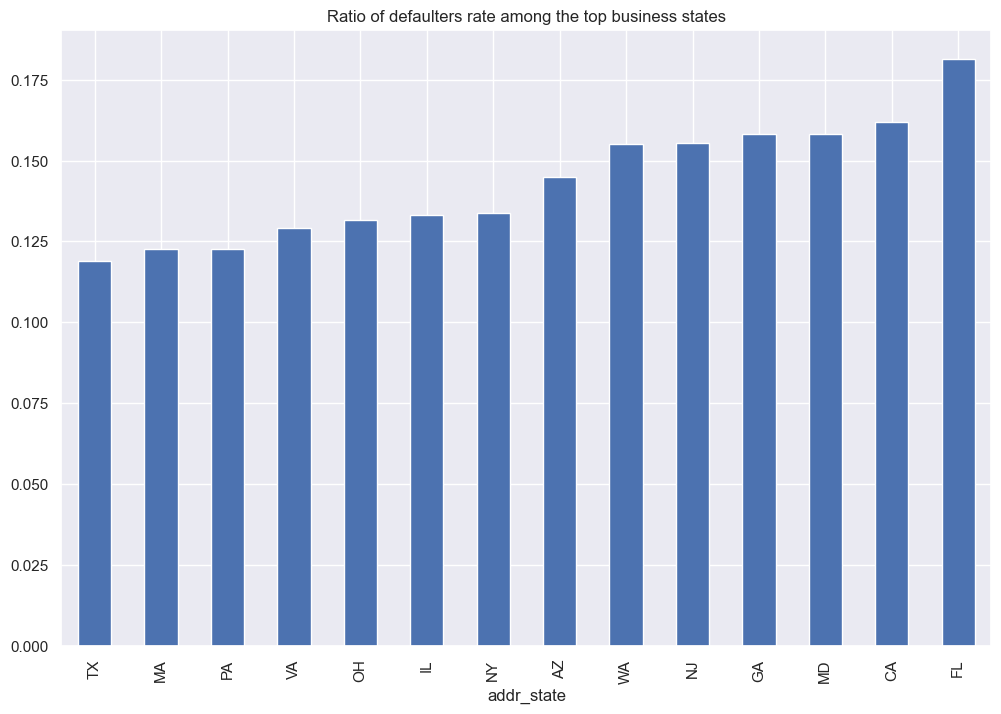

In [46]:
#Lets take top state from where most of the applicants are from.

addr_count= loan_refine.addr_state.value_counts().reset_index()
list_addr = addr_count[addr_count.addr_state > addr_count.addr_state.mean()]['index'].to_list()

loan_top_addr = loan_refine[loan_refine.addr_state.isin(list_addr)]

loan_cross_top_state_i= pd.crosstab(index=loan_top_addr['addr_state'],columns=loan_top_addr['loan_status'],normalize='index')


loan_cross_top_state_i['Charged Off'].sort_values().plot.bar();
plt.title('Ratio of defaulters rate among the top business states')

#observation: Among the top business states, highest defaulters are from FL. 


##### Applicants defaulted based on grade


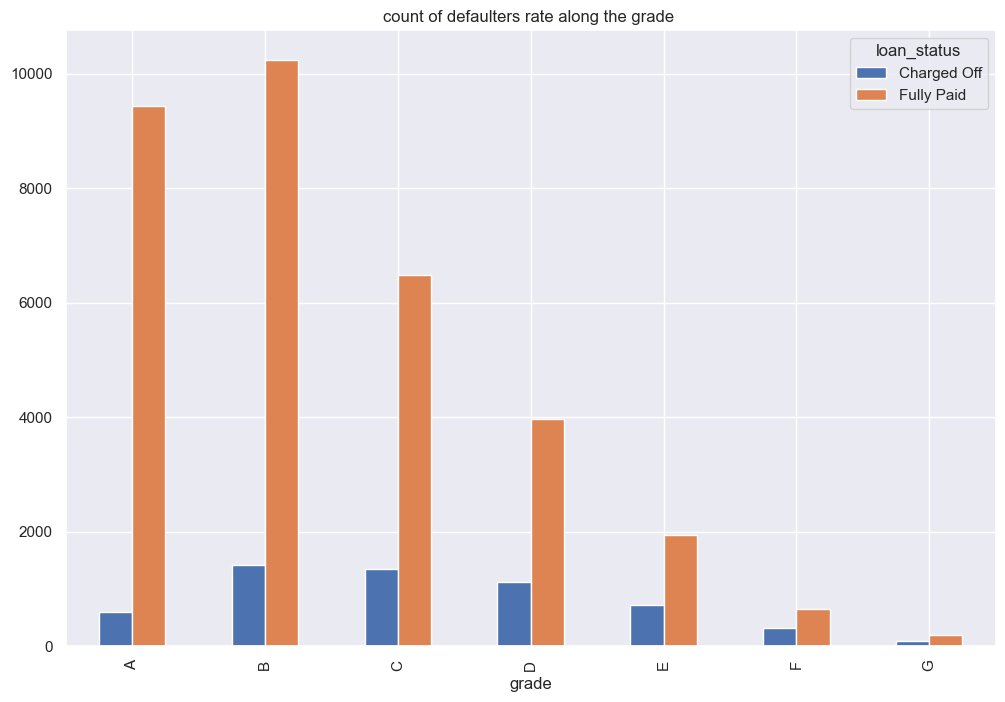

Text(0.5, 1.0, 'Ratio of defaulters rate along the grade ')

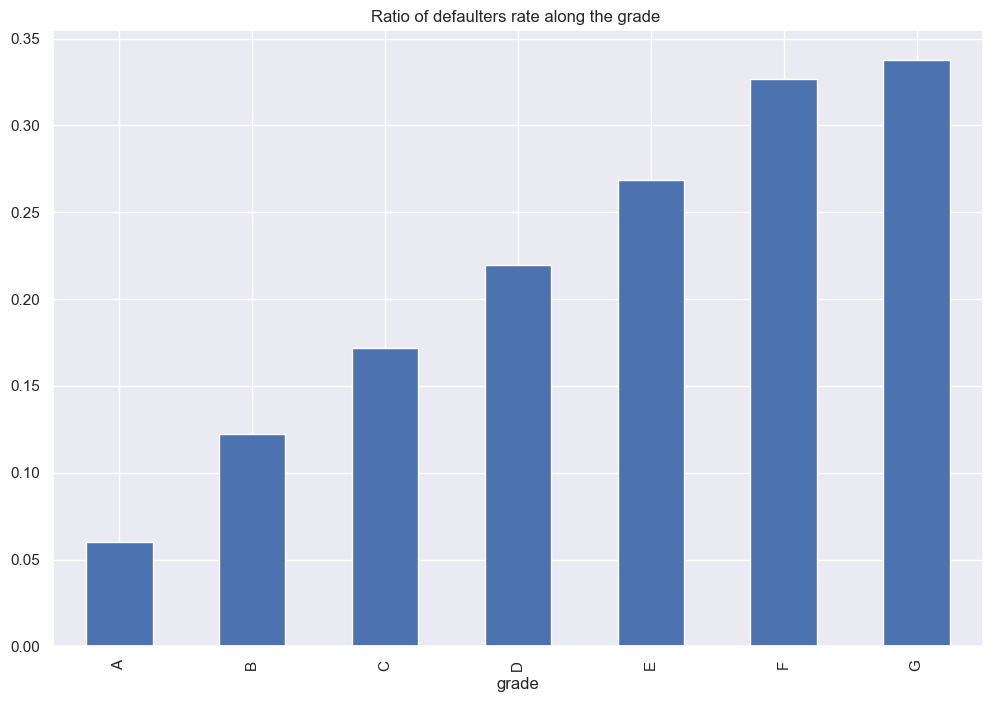

In [47]:
loan_cross_grade_freq= pd.crosstab(index=loan_refine['grade'],columns=loan_refine['loan_status'])
loan_cross_grade_freq.plot.bar();
plt.title('count of defaulters rate along the grade ')
plt.show()


loan_cross_grade_nor = pd.crosstab(index=loan_refine['grade'],columns=loan_refine['loan_status'],normalize='index')
loan_cross_grade_nor['Charged Off'].sort_values().plot.bar();
plt.title('Ratio of defaulters rate along the grade ')

#observation : Defaulters increase with the grade but the count of F and G grade records are very less.

##### Applicants defaulted based on annual_inc

For making analysis easy, lets bracket the annual_inc across all the applicant

In [48]:
loan_refine.annual_inc.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0       4000.0
0.1      30000.0
0.2      37156.0
0.3      44500.0
0.4      50004.0
0.5      58800.0
0.6      65004.0
0.7      75000.0
0.8      90000.0
0.9     115000.0
1.0    1250000.0
Name: annual_inc, dtype: float64

In [49]:
def classify_income(income):
    if income >= 0 and income < 25000:
        return '0-25k'
    elif income >= 25000 and income < 50000:
        return '25-50k'
    elif income >= 50000 and income < 100000:
        return '50-100k'
    elif income >= 100000:
        return '100k+'
    
loan_refine['income_bracket'] = loan_refine.annual_inc.apply(classify_income)
    

In [50]:
loan_refine['income_bracket'].value_counts()
#As already observed in histoplot for annual_income, most of the applicant are from 50-100k bracket

50-100k    18238
25-50k     12057
100k+       5972
0-25k       2303
Name: income_bracket, dtype: int64

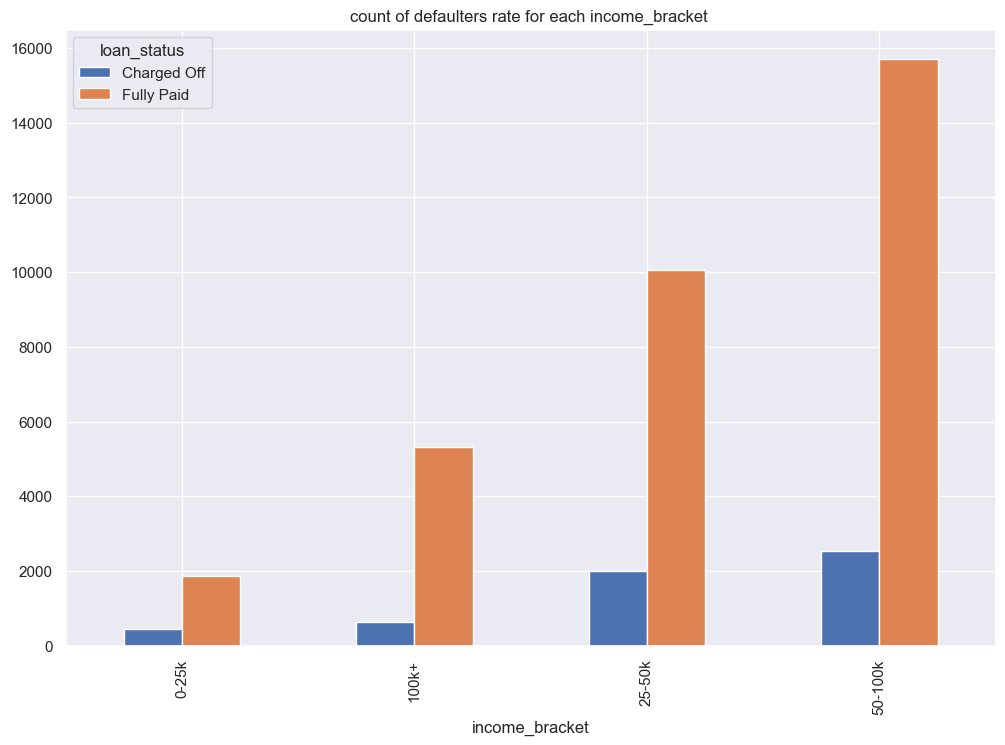

Text(0.5, 1.0, 'Ratio of defaulters rate for each income_bracket ')

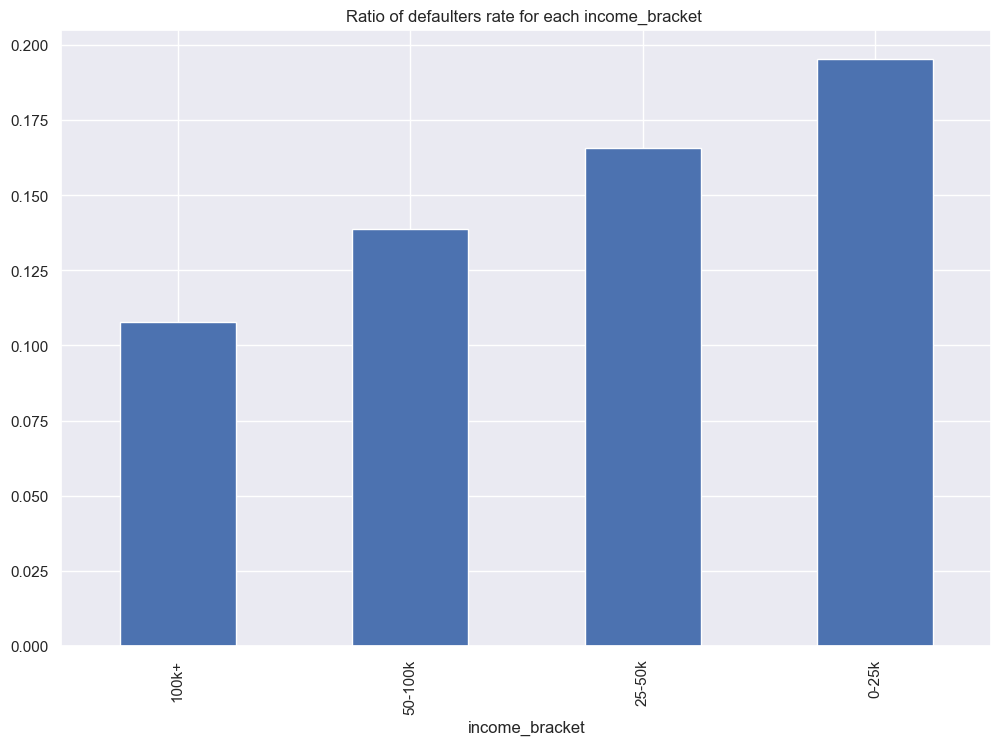

In [51]:
loan_cross_annual_bracket_count = pd.crosstab(index=loan_refine['income_bracket'],columns = loan_refine['loan_status'])
loan_cross_annual_bracket_count.plot.bar();
plt.title('count of defaulters rate for each income_bracket ')
plt.show()


loan_cross_annual_bracket = pd.crosstab(index=loan_refine['income_bracket'],columns = loan_refine['loan_status'],normalize='index')
loan_cross_annual_bracket['Charged Off'].sort_values().plot.bar();
plt.title('Ratio of defaulters rate for each income_bracket ')

#observation: Most of the defaulters are in 0-25k bracket

##### Applicants defaulted based on int_rate

For making analysis easy, lets bracket the int_rate across all the applicant

In [52]:
loan_refine.int_rate.quantile([0,0.25,0.5,0.75,1])

0.00     5.42
0.25     8.94
0.50    11.71
0.75    14.41
1.00    24.40
Name: int_rate, dtype: float64

In [53]:
##### Applicants defaulted based on interest rate
def classify_int_rate(rate):
    if rate >= 0 and rate < 9:
        return '0-9%'
    elif rate >= 9 and rate < 12:
        return '9-12%'
    elif rate >= 12 and rate < 18:
        return '12-18%'
    elif rate >= 18:
        return '18+%'
    
loan_refine['int_rate_bracket'] = loan_refine.int_rate.apply(classify_int_rate)

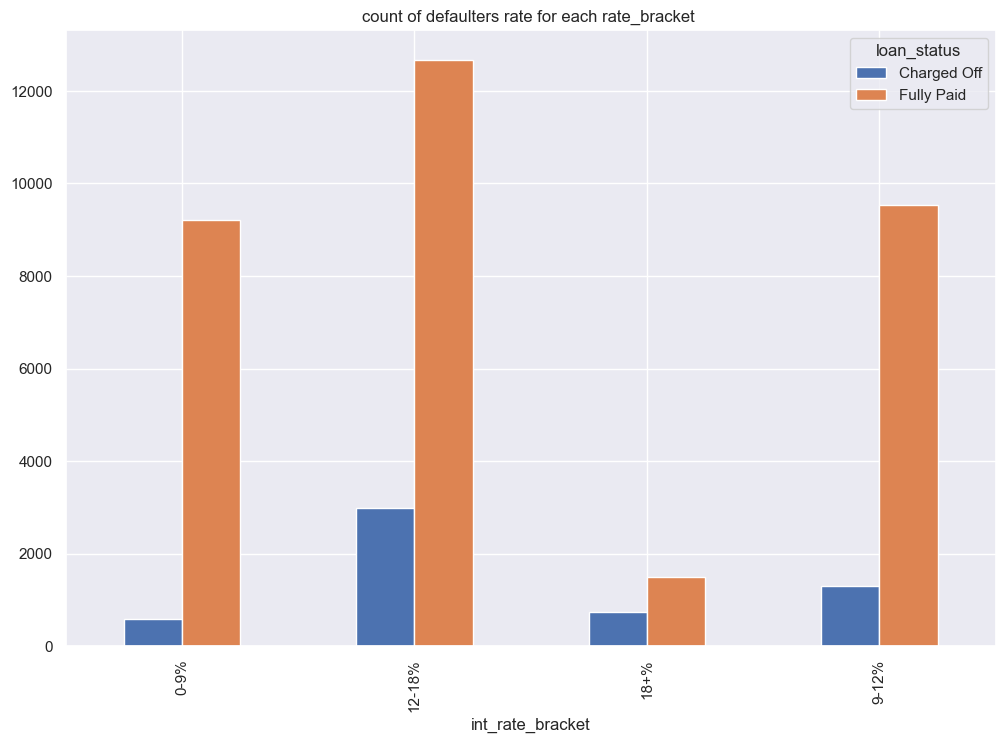

Text(0.5, 1.0, 'Ratio of defaulters rate for each rate_bracket ')

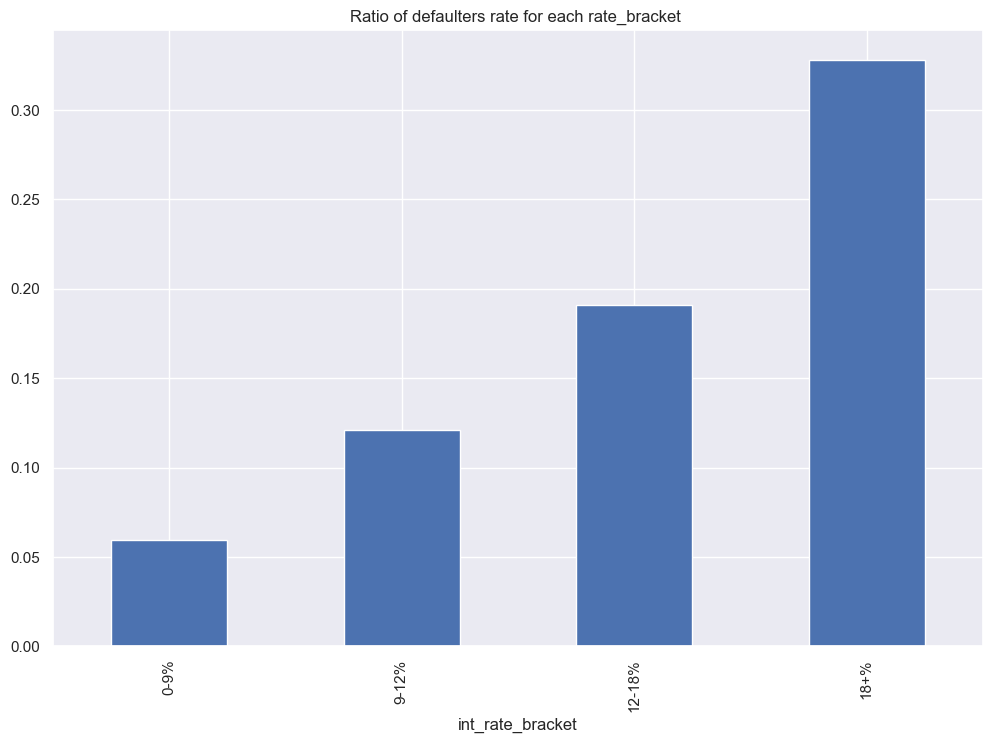

In [54]:
loan_cross_interest_bracket_count = pd.crosstab(index=loan_refine['int_rate_bracket'],columns = loan_refine['loan_status'])
loan_cross_interest_bracket_count.plot.bar();
plt.title('count of defaulters rate for each rate_bracket ')
plt.show()


loan_cross_interest_bracket = pd.crosstab(index=loan_refine['int_rate_bracket'],columns = loan_refine['loan_status'],normalize='index')
loan_cross_interest_bracket['Charged Off'].sort_values().plot.bar();
plt.title('Ratio of defaulters rate for each rate_bracket ')

#observation: Clearly there are many defaulters in 18+% interest rate bracket

##### Applicants defaulted based on term selected


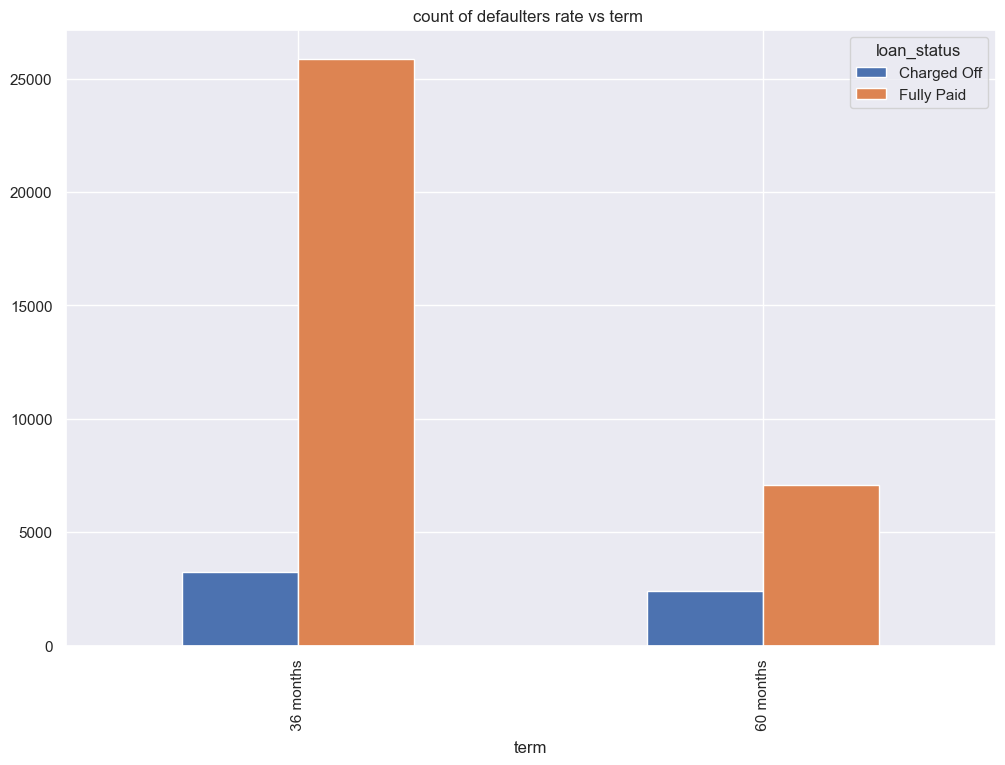

Text(0.5, 1.0, 'Ratio of defaulters rate vs term ')

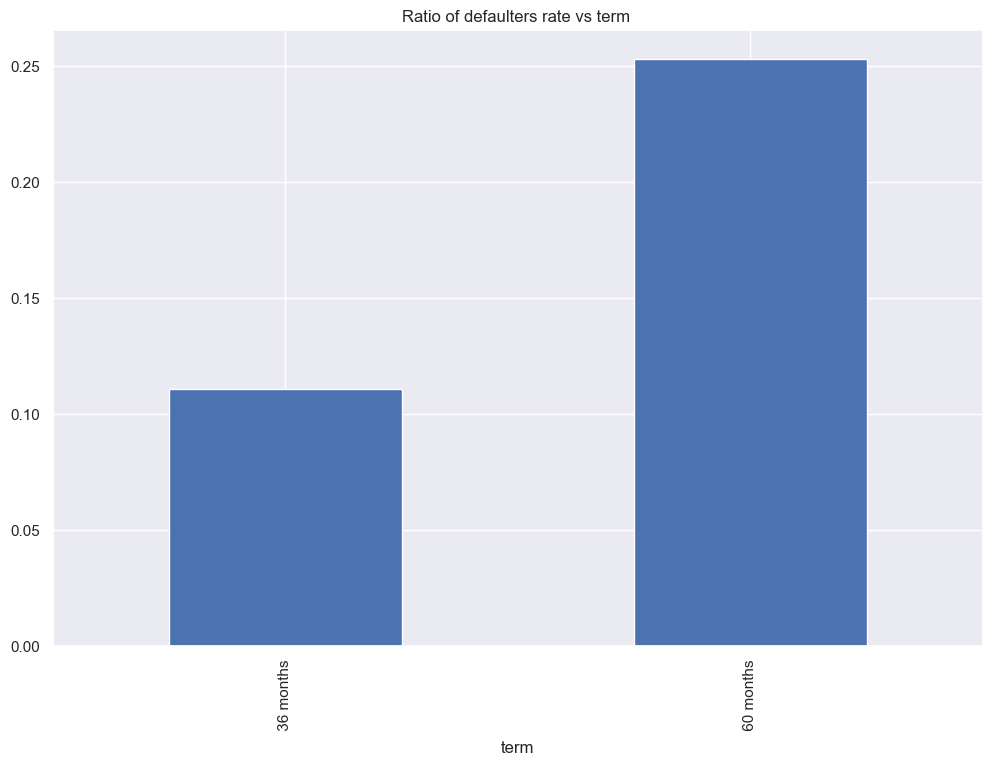

In [55]:
loan_cross_term_count = pd.crosstab(index=loan_refine['term'],columns = loan_refine['loan_status'])
loan_cross_term_count.plot.bar();
plt.title('count of defaulters rate vs term ')
plt.show()


loan_cross_term = pd.crosstab(index=loan_refine['term'],columns = loan_refine['loan_status'],normalize='index')
loan_cross_term['Charged Off'].sort_values().plot.bar();
plt.title('Ratio of defaulters rate vs term ')

#observation: Higher default rate among 60 months term

##### Applicants defaulted based on home ownership selected

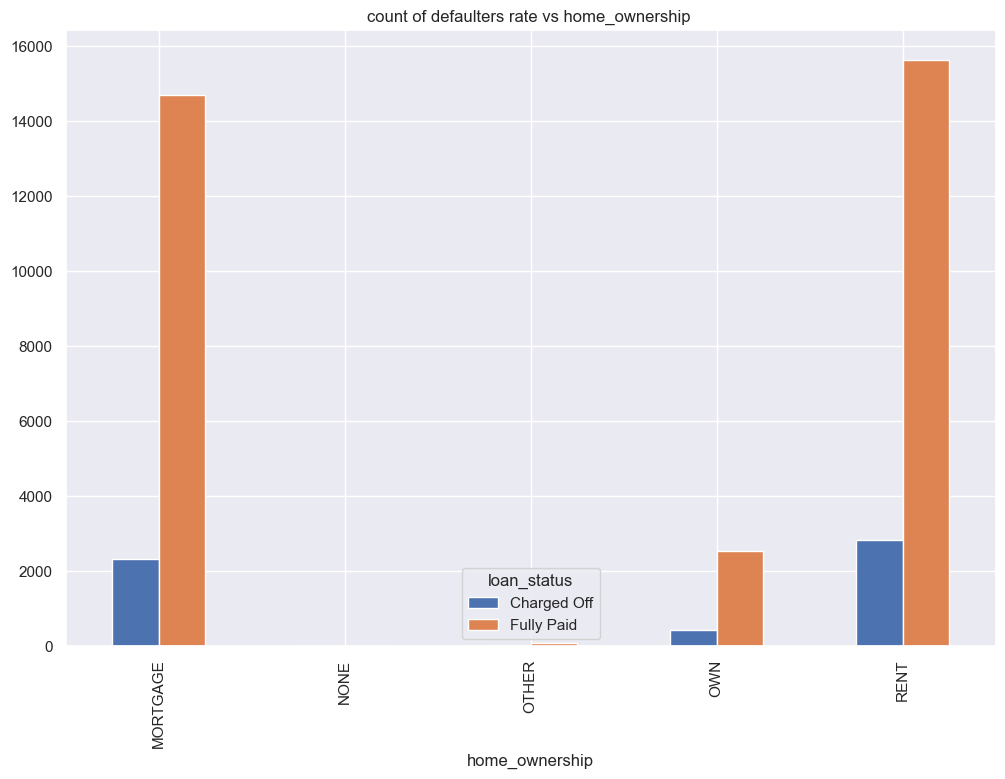

Text(0.5, 1.0, 'Ratio of defaulters rate vs home_ownership ')

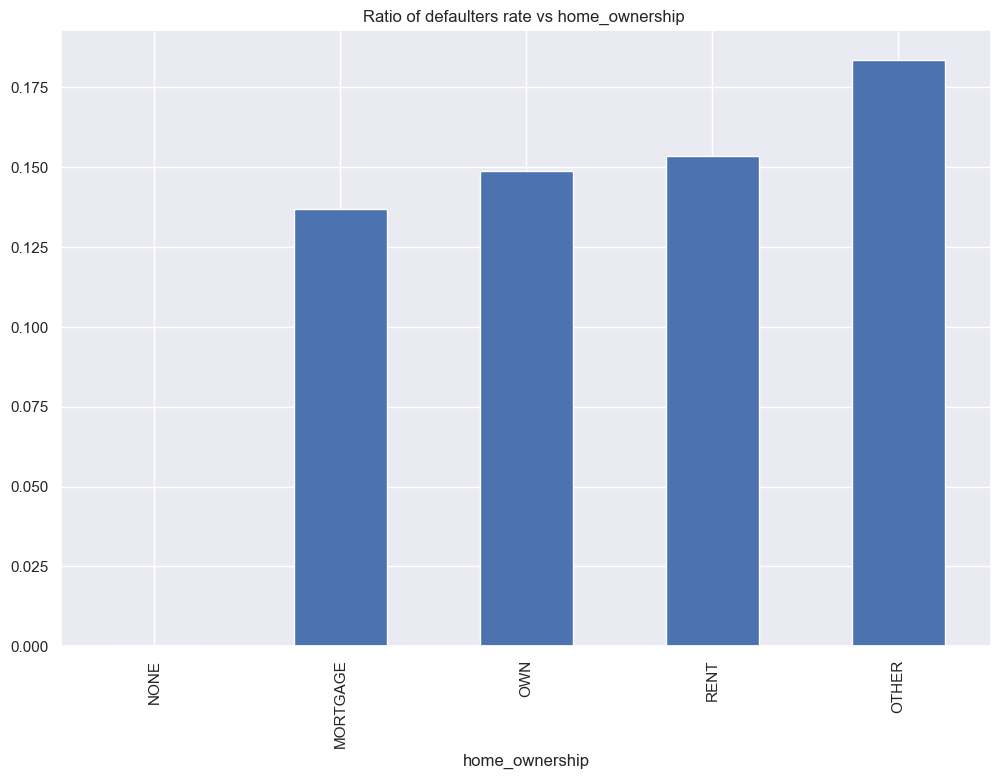

In [56]:
loan_cross_home_ownership_count = pd.crosstab(index=loan_refine['home_ownership'],columns = loan_refine['loan_status'])
loan_cross_home_ownership_count.plot.bar();
plt.title('count of defaulters rate vs home_ownership ')
plt.show()


loan_cross_home_ownership = pd.crosstab(index=loan_refine['home_ownership'],columns = loan_refine['loan_status'],normalize='index')
loan_cross_home_ownership['Charged Off'].sort_values().plot.bar();
plt.title('Ratio of defaulters rate vs home_ownership ')

# observation: No obvious observation

##### Applicants defaulted based on dti

In [57]:
loan_refine.dti.quantile([0,0.25,0.5,0.75,1])

0.00     0.00
0.25     8.13
0.50    13.37
0.75    18.56
1.00    29.99
Name: dti, dtype: float64

In [58]:

def classify_dti(dti):
    if dti >= 0 and dti < 8:
        return '0-8%'
    elif dti >= 8 and dti < 16:
        return '8-16%'
    elif dti >= 16 and dti < 25:
        return '16-25%'
    elif dti >= 25:
        return '25+%'
    
loan_refine['dti_bracket'] = loan_refine.int_rate.apply(classify_dti)

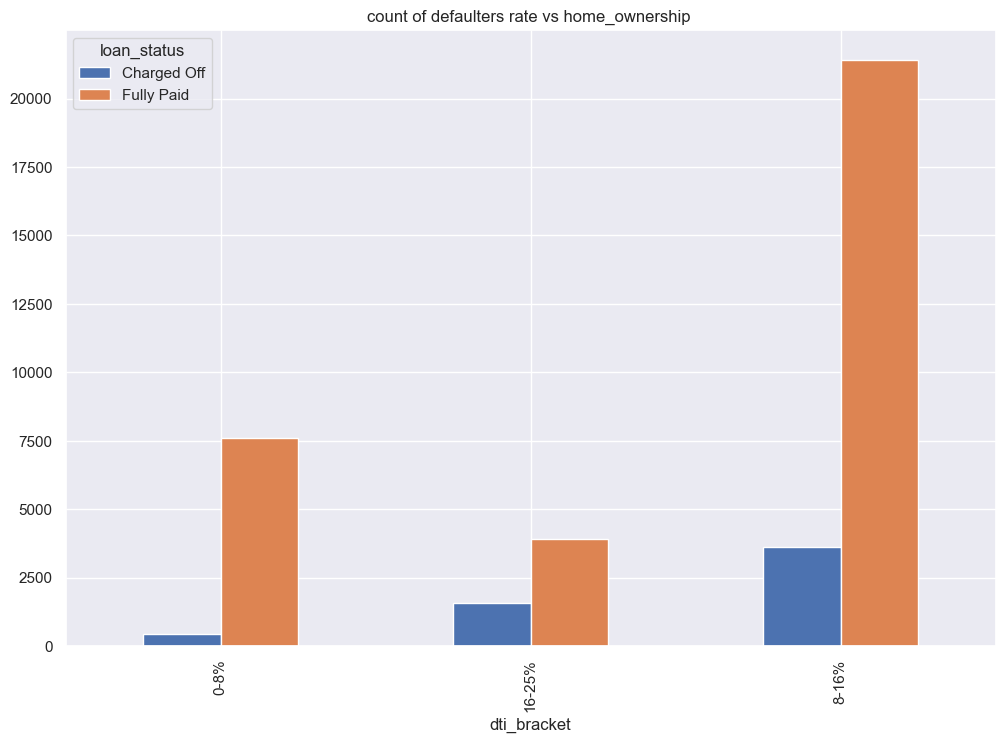

Text(0.5, 1.0, 'Ratio of defaulters rate vs home_ownership ')

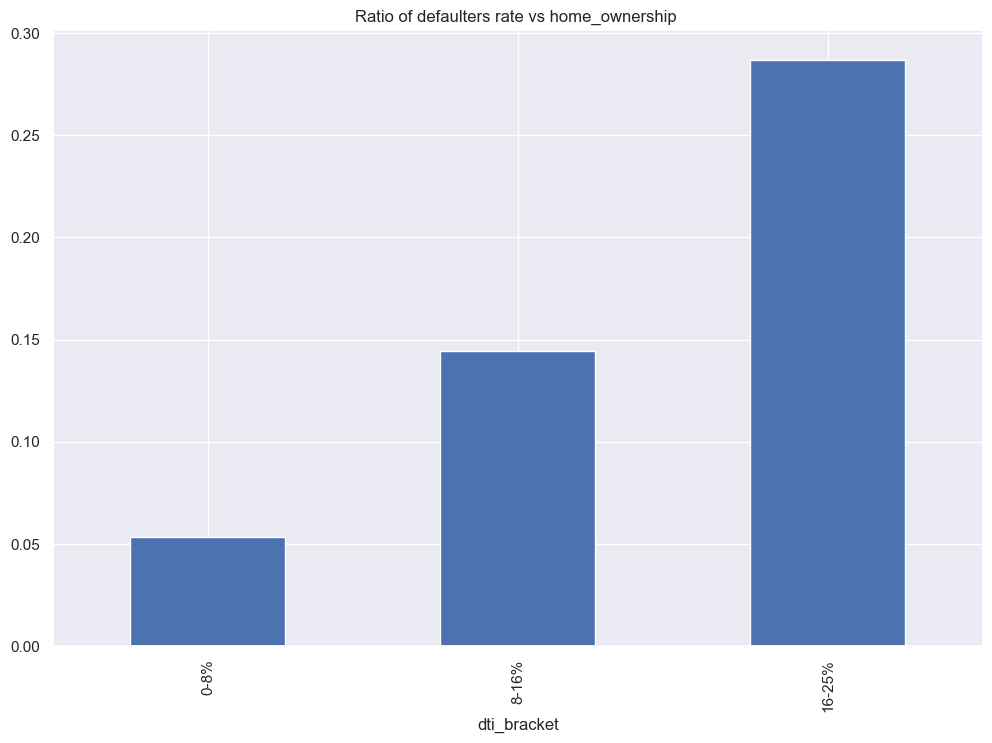

In [59]:
loan_cross_dti_count = pd.crosstab(index=loan_refine['dti_bracket'],columns = loan_refine['loan_status'])
loan_cross_dti_count.plot.bar();
plt.title('count of defaulters rate vs home_ownership ')
plt.show()


loan_cross_dti = pd.crosstab(index=loan_refine['dti_bracket'],columns = loan_refine['loan_status'],normalize='index')
loan_cross_dti['Charged Off'].sort_values().plot.bar();
plt.title('Ratio of defaulters rate vs home_ownership ')

# observation: defaults increases with dti score

## Bivariate analysis

* #### Continous vs Continous variables
    - pairplot on continous columns
    - heatmap on continous columns

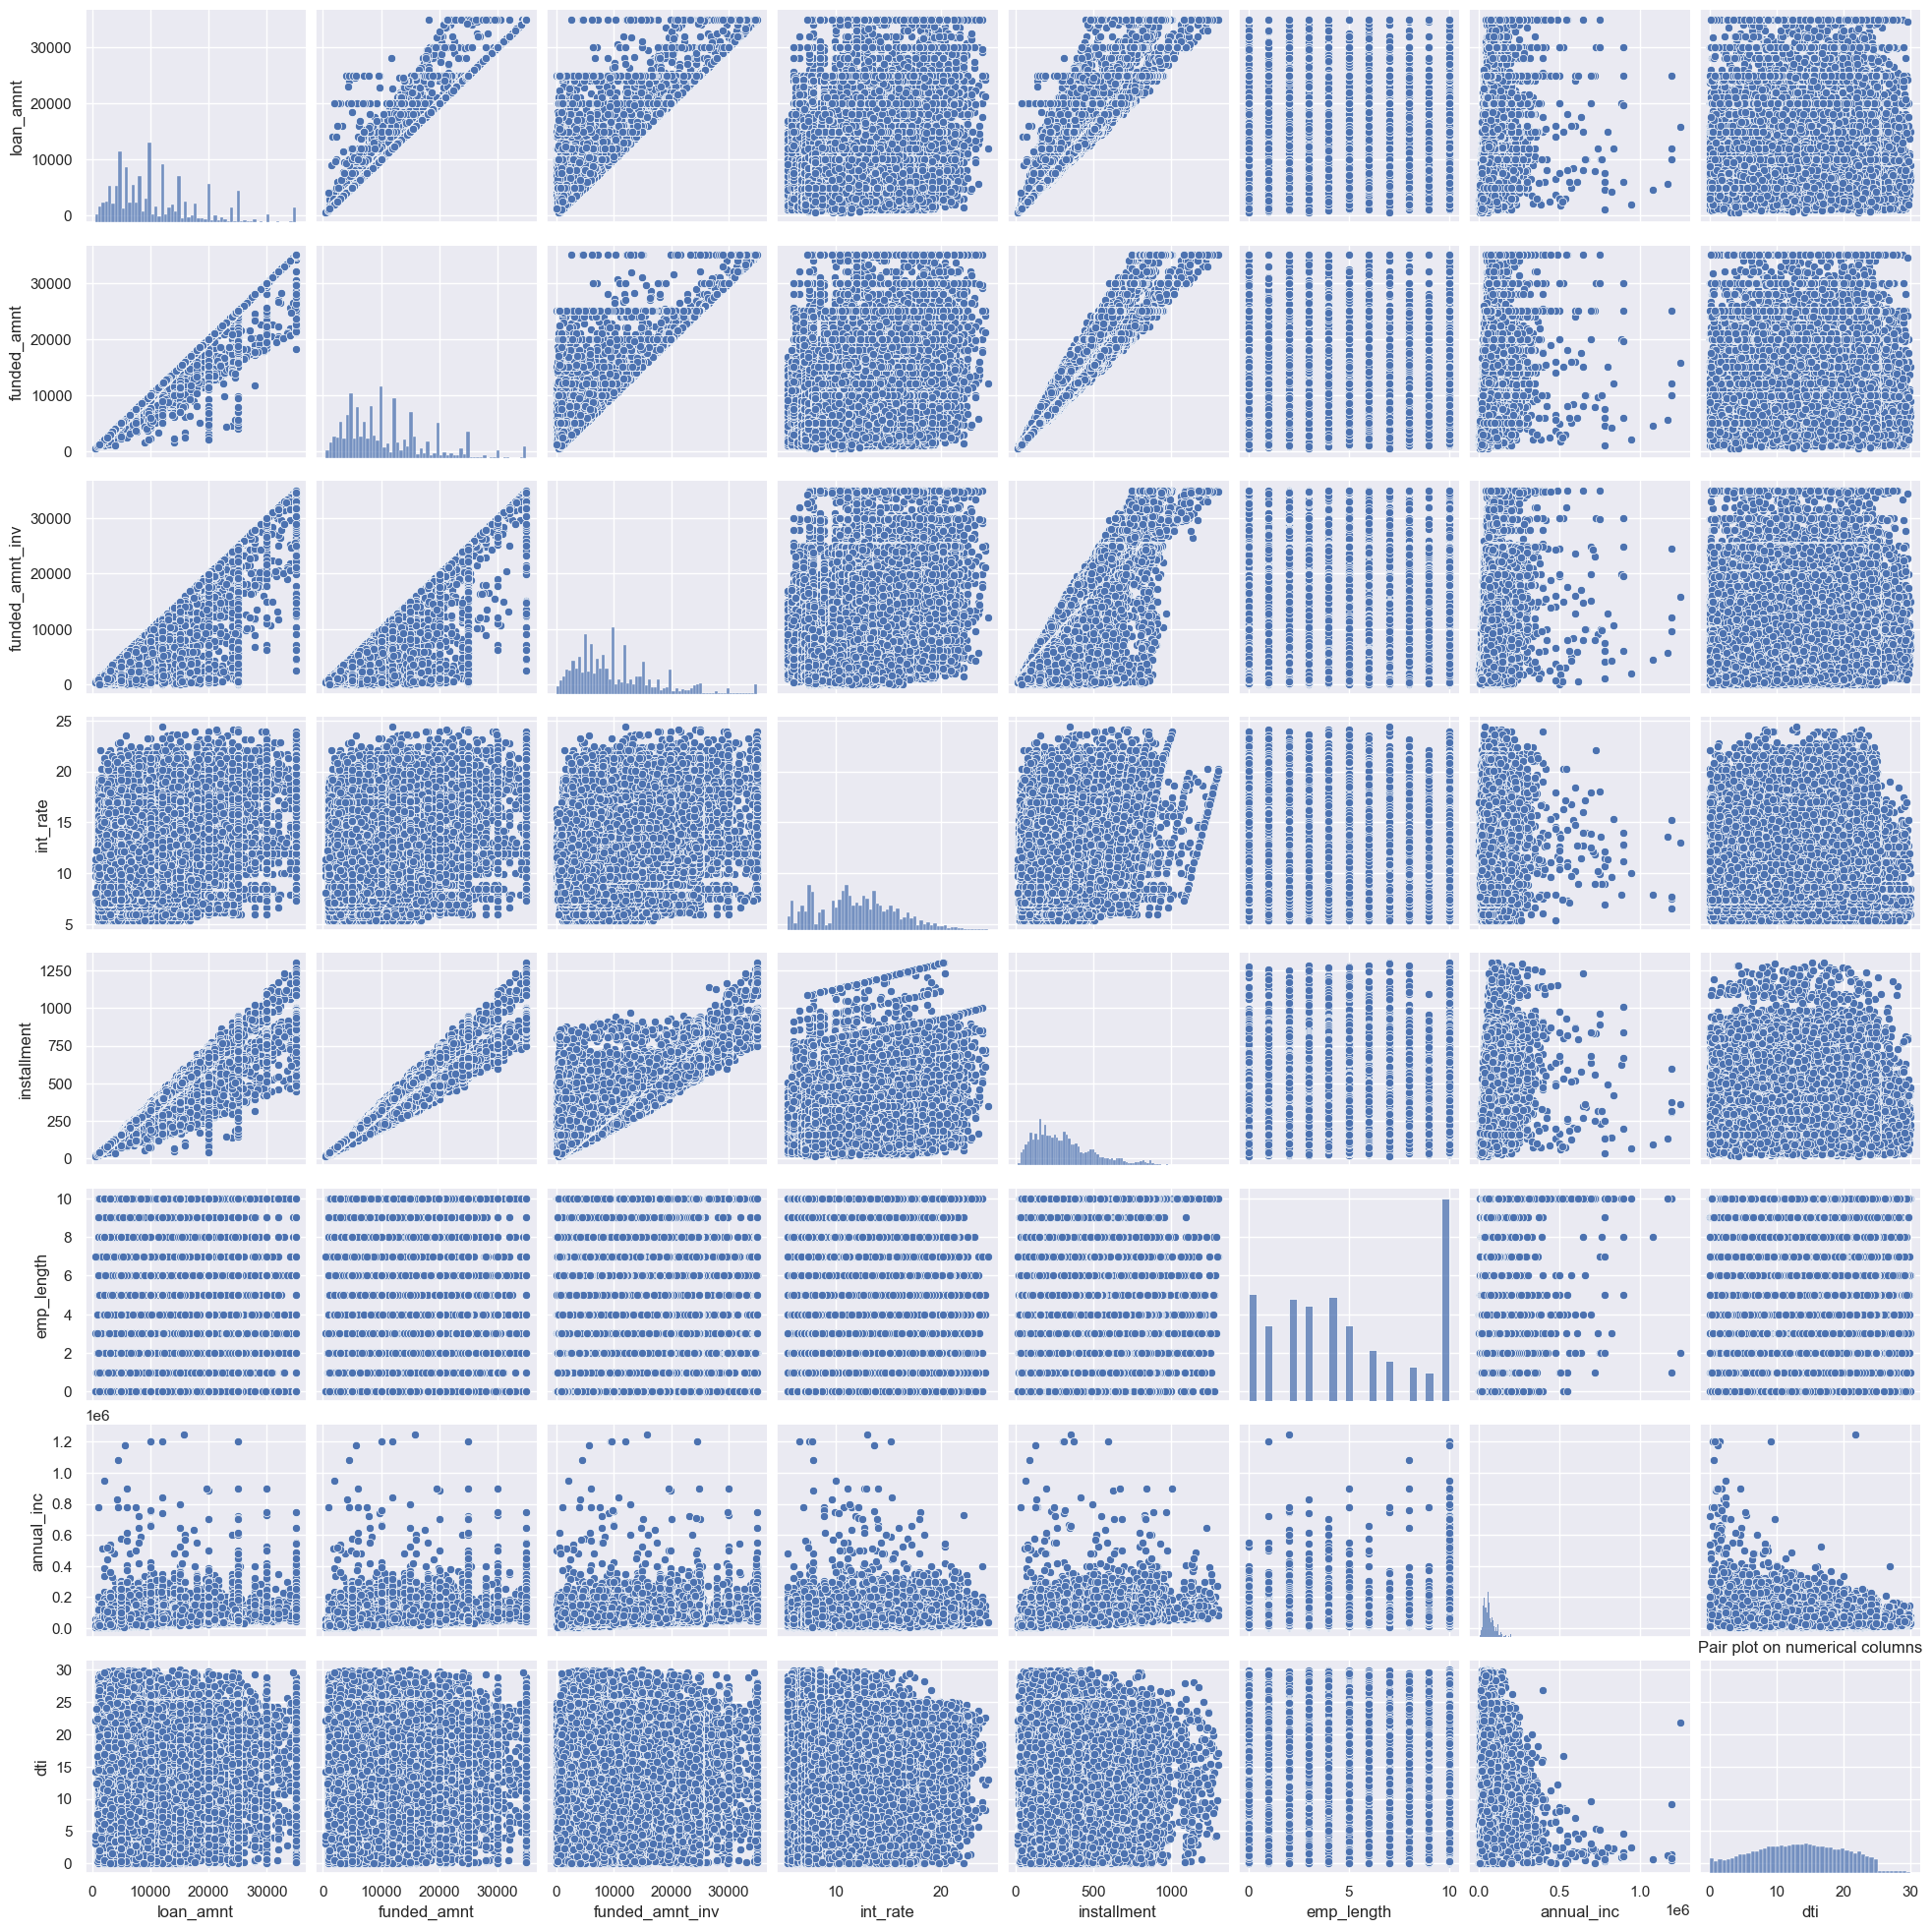

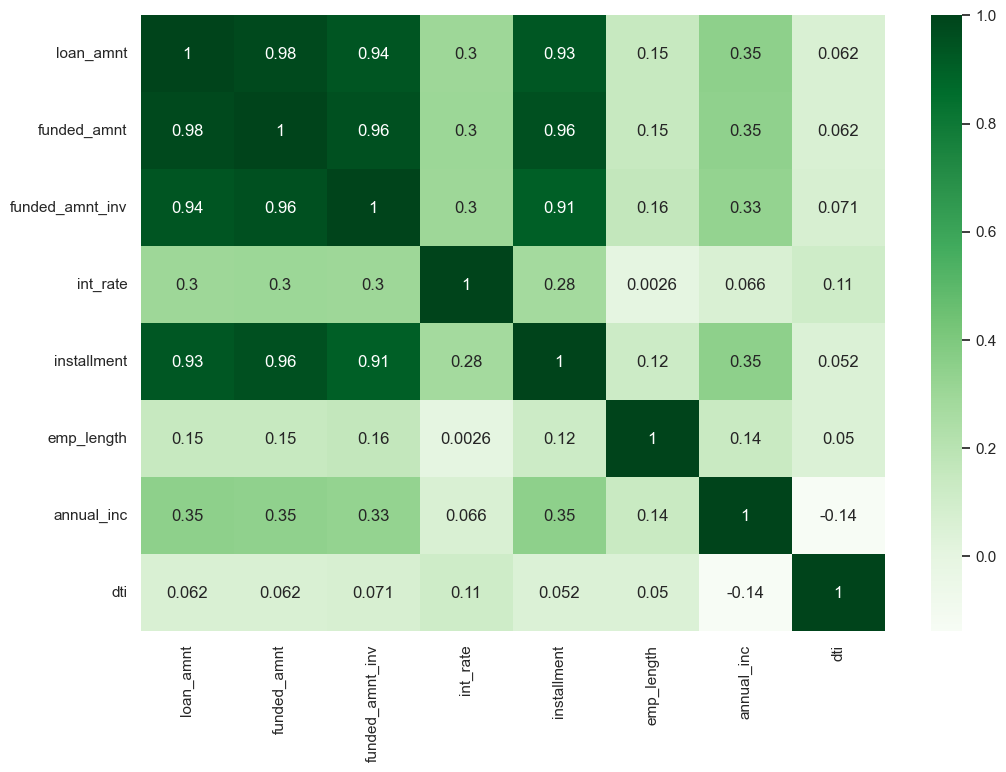

In [73]:
#plot pair plot and heatmap for numerical columns to check co-relation

sns.pairplot(data=loan_refine[numeric_cols],kind='scatter');
plt.title("Pair plot on numerical columns")
plt.show()

sns.heatmap(data=loan_refine[numeric_cols].corr(),cmap='Greens',annot=True);
plt.show()

#### Observation:

    - As observed before, strong correlation between loan_amount/funded_amnt/funded_amnt_inv
    - 'installment' has string correlation with the amount columns which is obvious.
    - Relatively positive co-relation between annual_inc to loan_amnt.
    - Negative co-relation between annual_inc and dti
    - Also 0.3 positive cor-relation of int_rate with loan amnt. Could be that the int_rate increases withloan_amount.
    

* #### Categorical vs Continous variables
    - plot btw fund_amnt_inv_bracket vs int_rate
    - plot btw grade vs int_rate
    - plot btw subgrade vs int_rate
    - plot btw emp_length vs int_rate
    - plot btw purpose vs int_rate
    - plot btw addr_state vs int_rate
    - plot btw term vs int_rate

In [61]:
loan_refine.funded_amnt_inv.quantile([0,0.25,0.5,0.75,1])

0.00        0.000000
0.25     5000.000000
0.50     8736.649151
0.75    14000.000000
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='fund_amnt_inv_bracket', ylabel='int_rate'>

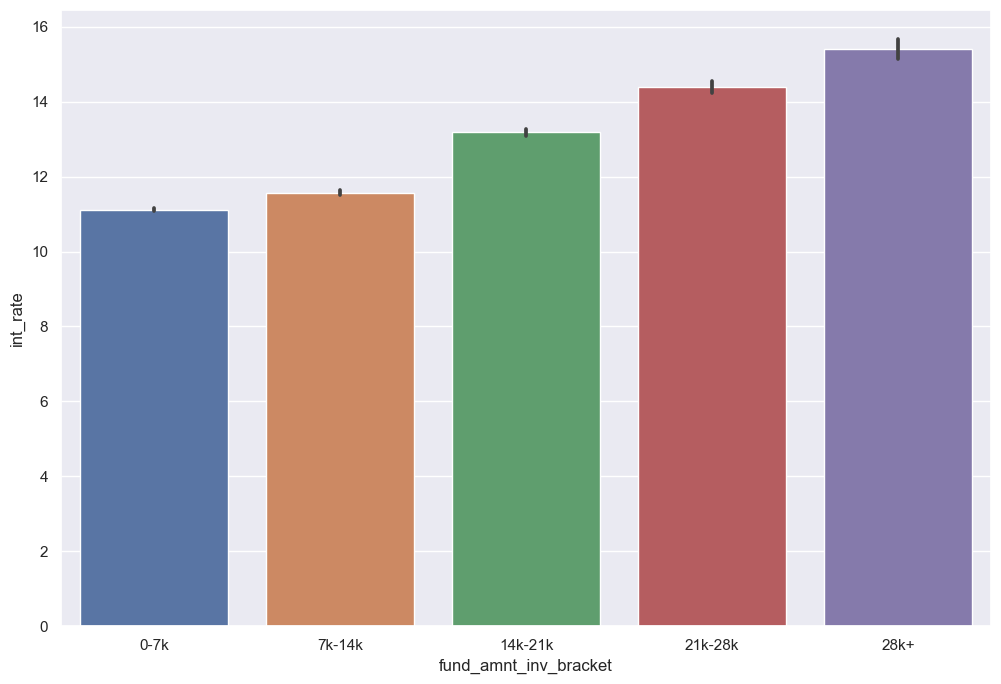

In [62]:
# plot btw fund_amnt_inv_bracket vs int_rate
def classify_fund_amnt_inv(amnt):
    if amnt >= 0 and amnt < 7000:
        return '0-7k'
    elif amnt >= 7000 and amnt < 14000:
        return '7k-14k'
    elif amnt >= 14000 and amnt < 21000:
        return '14k-21k'
    elif amnt >= 21000 and amnt < 28000:
        return '21k-28k'
    elif amnt >= 28000:
        return '28k+'
    
loan_refine['fund_amnt_inv_bracket'] = loan_refine.funded_amnt_inv.apply(classify_fund_amnt_inv)
sns.barplot(data=loan_refine,x='fund_amnt_inv_bracket',y='int_rate')

#As already observed in heatmap, the int_rate increase with the loan amount related columns

Text(0.5, 1.0, 'grade vs int_rate')

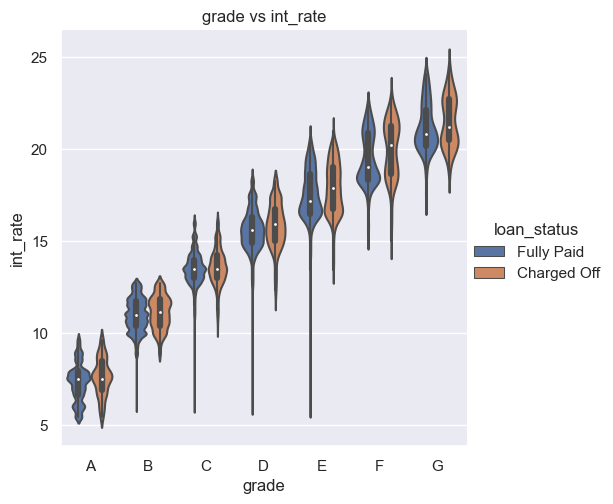

In [63]:
# plot btw grade vs int_rate
sns.catplot(data=loan_refine,x='grade',y='int_rate',hue='loan_status',kind='violin',order=['A','B','C','D','E','F','G'])
plt.title('grade vs int_rate')

#observation: Interest rate increase with grade A->G

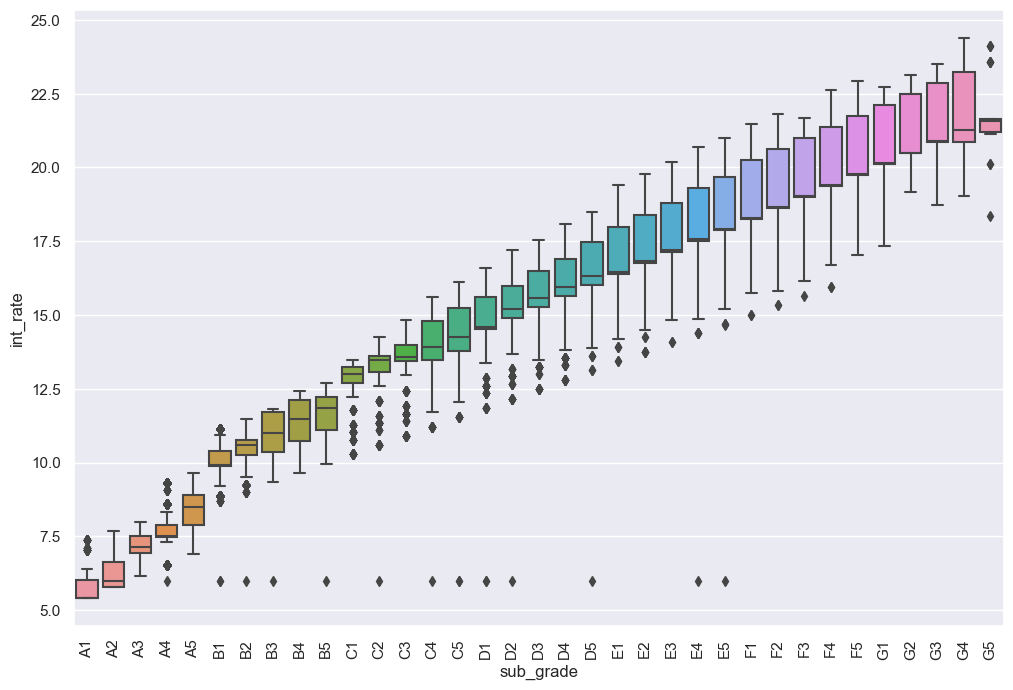

In [64]:
# plot btw subgrade vs int_rate

#For better understanding, lets sort with median
median_sub_grade_sort=loan_refine.groupby(by='sub_grade').median().sort_values('int_rate').index.to_list()

sns.boxplot(data=loan_refine,x='sub_grade',y='int_rate',order=median_sub_grade_sort)
plt.xticks(rotation=90);

#observation: same as grade, Interest rate increase with sub grade Ax->Gx

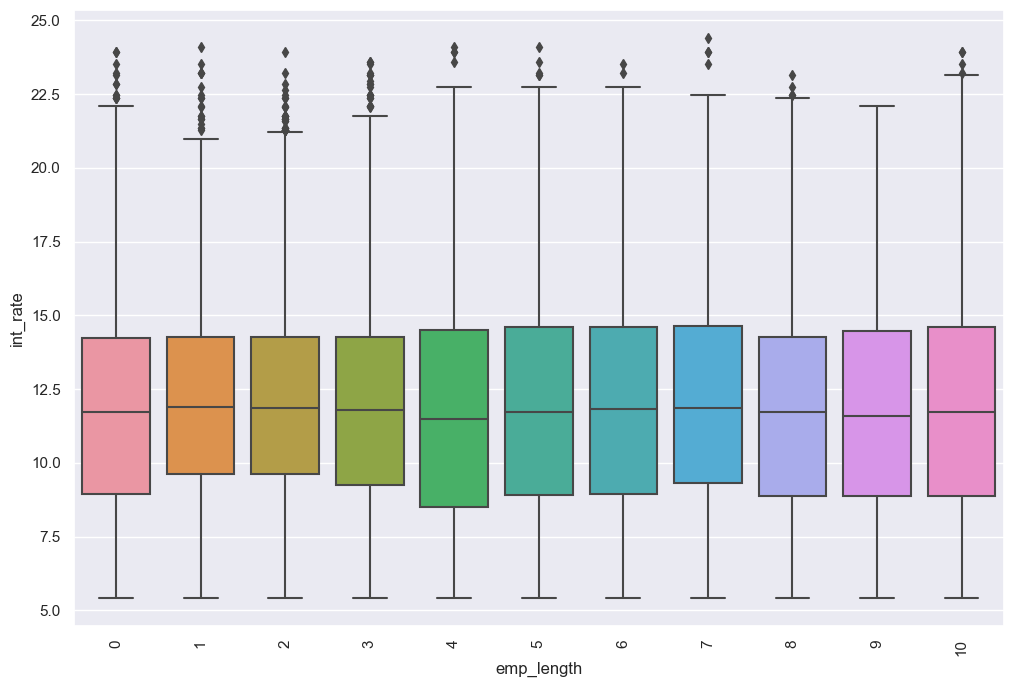

In [65]:
# plot btw emp_length vs int_rate
sns.boxplot(data=loan_refine,x='emp_length',y='int_rate')
plt.xticks(rotation=90);

#observation: int_rate is mostly same across all the emp_length

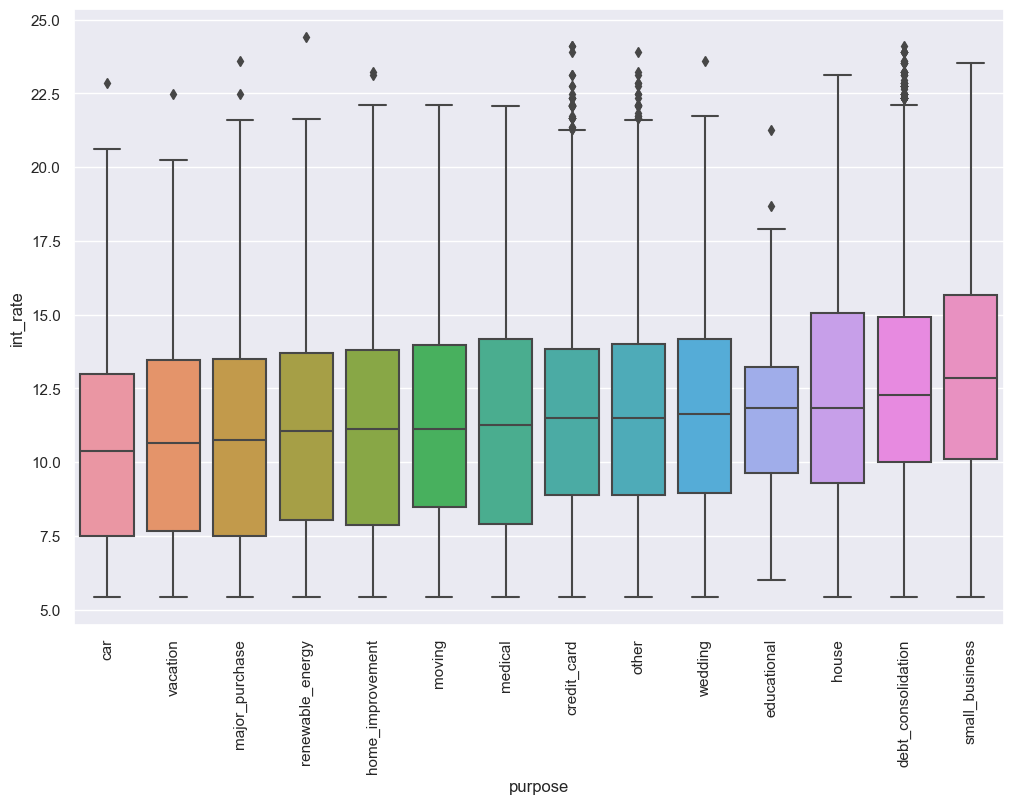

In [66]:
# plot btw purpose vs int_rate

#For better understanding, lets sort with median
median_sort=loan_refine.groupby(by='purpose').median().sort_values('int_rate').index.to_list()

sns.boxplot(data=loan_refine,x='purpose',y='int_rate',order=median_sort)
plt.xticks(rotation=90);


#observation: Clearyly the 'small_business' have higher interest rates followed by debt_consolidation

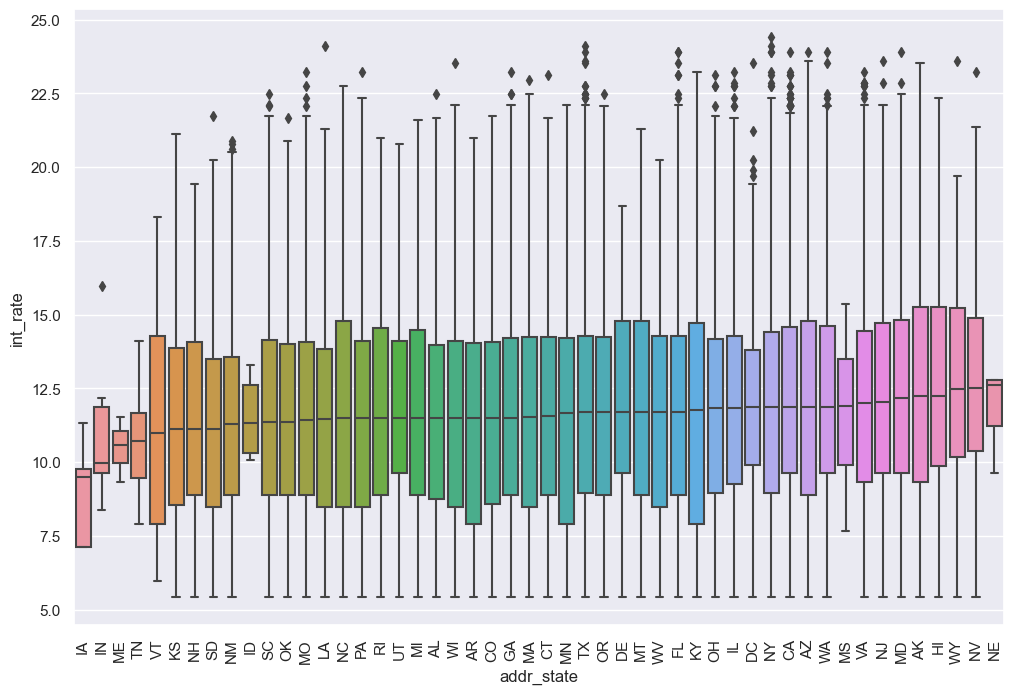

In [67]:
# plot btw addr_state vs int_rate

#For better understanding, lets sort with median
median_sort=loan_refine.groupby(by='addr_state').median().sort_values('int_rate').index.to_list()

sns.boxplot(data=loan_refine,x='addr_state',y='int_rate',order=median_sort)
plt.xticks(rotation=90);

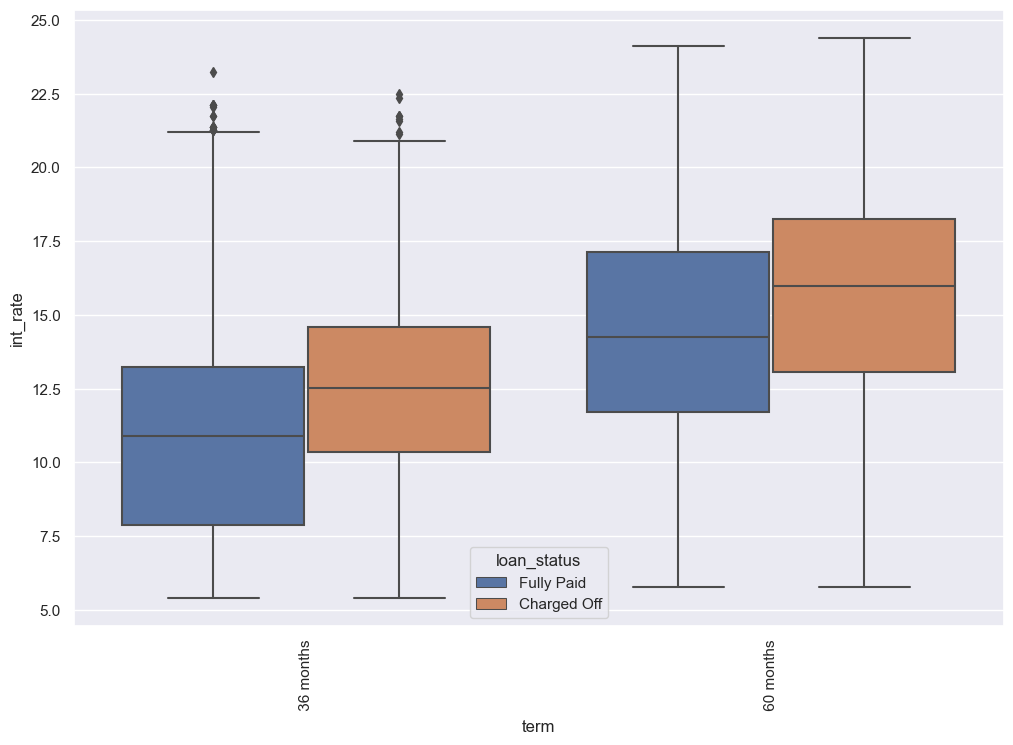

In [68]:
# plot btw term vs int_rate

sns.boxplot(data=loan_refine,x='term',y='int_rate',hue='loan_status')
plt.xticks(rotation=90);

#observation: Interest rate is more for 60 months term. Also the defaulters are mostly having under higher interest rate in both term options.

### Derived analysis

- Type driven metrics
    - Taking months from 'issue_d'
- Data driven metrics
    - How defaulters rate  changes to ratio of loan_amnt to annual_inc compared over term option

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'December'),
  Text(1, 0, 'November'),
  Text(2, 0, 'October'),
  Text(3, 0, 'September'),
  Text(4, 0, 'August'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'May'),
  Text(8, 0, 'April'),
  Text(9, 0, 'March'),
  Text(10, 0, 'February'),
  Text(11, 0, 'January')])

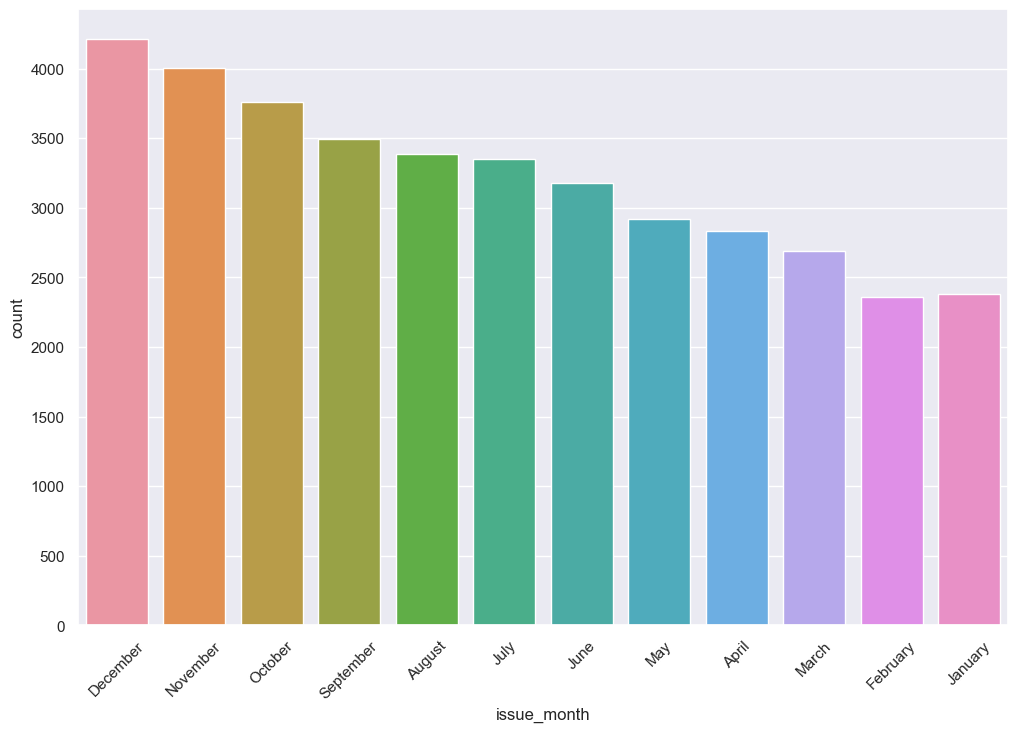

In [69]:
# Derive month from issue_d and plot count plot

loan_refine['issue_month']=loan_refine['issue_d'].dt.strftime('%B')

sns.countplot(loan_refine.issue_month)
plt.xticks(rotation = 45)

#observation: Application for loan increases towards year end.

In [70]:
loan_refine['ratio_loan2inc']=loan_refine['loan_amnt']/loan_refine['annual_inc']*100

In [71]:
loan_refine.ratio_loan2inc.quantile([0,0.25,0.5,0.75,1])

0.00     0.128205
0.25     9.803922
0.50    16.304348
0.75    25.000000
1.00    83.000000
Name: ratio_loan2inc, dtype: float64

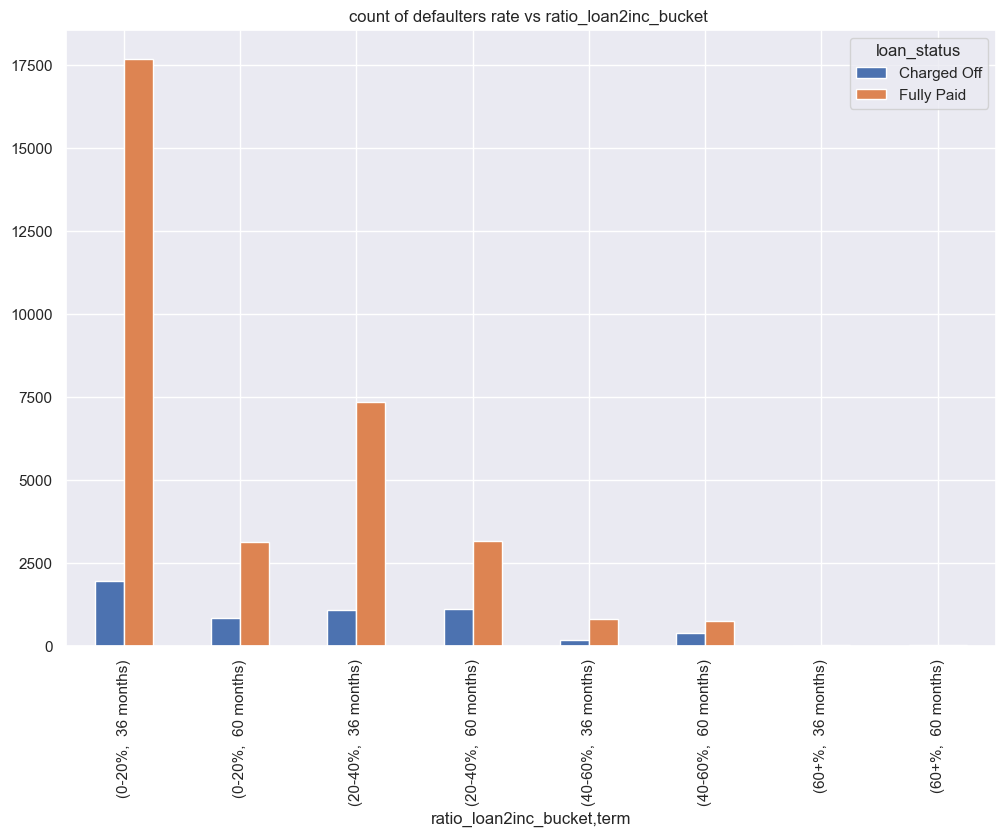

Text(0.5, 1.0, 'Ratio of defaulters rate vs ratio_loan2inc_bucket ')

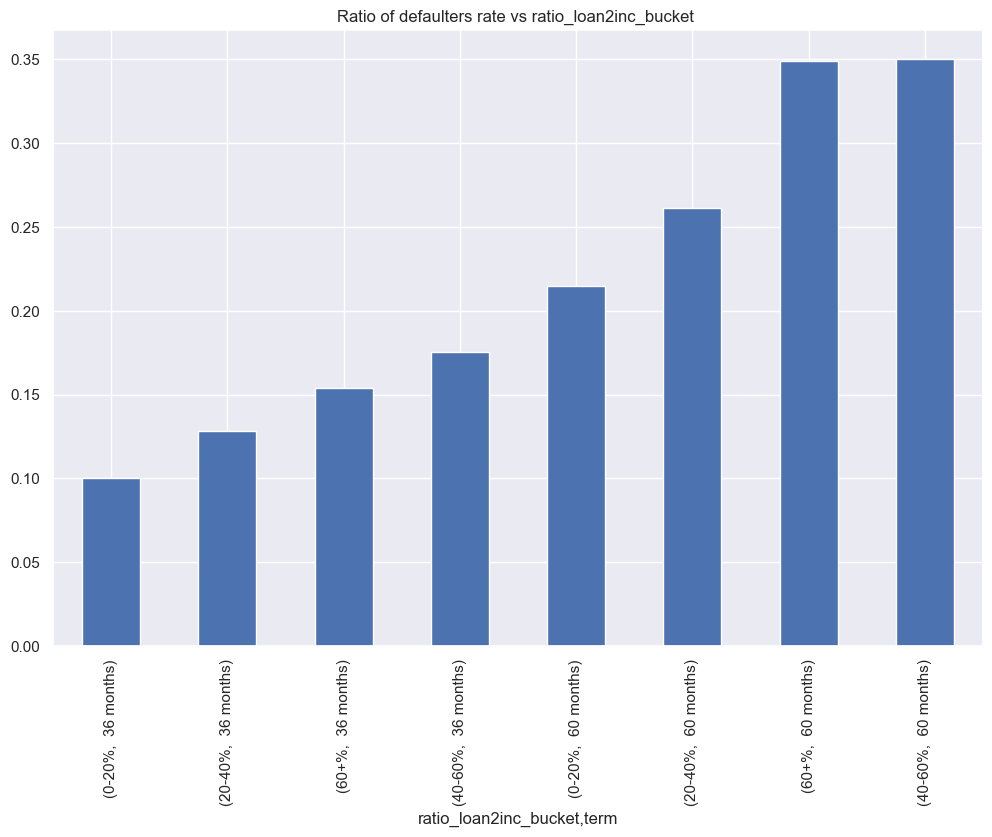

In [72]:
def classify_ratio2inc(ratio2inc):
    if ratio2inc >= 0 and ratio2inc < 20:
        return '0-20%'
    elif ratio2inc >= 20 and ratio2inc < 40:
        return '20-40%'
    elif ratio2inc >= 40 and ratio2inc < 60:
        return '40-60%'
    else:
        return '60+%'
    
loan_refine['ratio_loan2inc_bucket']=loan_refine.ratio_loan2inc.apply(classify_ratio2inc)

    
loan2inc_bucket_count = pd.crosstab(index=[loan_refine['ratio_loan2inc_bucket'],loan_refine['term']],columns = loan_refine['loan_status'])
loan2inc_bucket_count.plot.bar();
plt.title('count of defaulters rate vs ratio_loan2inc_bucket ')
plt.show()


loan2inc_bucket = pd.crosstab(index=[loan_refine['ratio_loan2inc_bucket'],loan_refine['term']],columns = loan_refine['loan_status'],normalize='index')
loan2inc_bucket['Charged Off'].sort_values().plot.bar();
plt.title('Ratio of defaulters rate vs ratio_loan2inc_bucket ')


# Observation: Interesting insight that as the ratio of loan_amnt to annual_inc increase, the defaulters count increases.